# **Importing packages into Jupyter Notebook**

In [5]:
#Import packages into Jupyter Notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import ttest_ind

#Ignore errors
import warnings
warnings.filterwarnings('ignore')

# **Data Wrangling**

In [7]:
#Imported CSV to Jupyter notebook
#Displayed head to see if it was pulled correctly
graduate_data_df = pd.read_csv('Resources/original_graduates.csv')
graduate_data_df.head()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999,0,160585.73,51000,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999,9000,126176.52,56000,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999,8000,148872.00,60000,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999,10000,129070.55,50000,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999,0,134299.53,49000,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


In [8]:
# Load the tuition cost data from a CSV file into a DataFrame
tuition_cost_df = pd.read_csv('Resources/Tuition_Cost.csv')

# Display the first few rows of the DataFrame to inspect the loaded data
print(tuition_cost_df.head())

# Clean the 'Total tuition' column by removing dollar signs and commas, then convert the column to integers
tuition_cost_df['Total tuition'] = tuition_cost_df['Total tuition'].replace({'\$': '', ',': ''}, regex=True).astype(int)
# Clean the 'Public Tuition' column by removing dollar signs and commas, then convert the column to integers
tuition_cost_df['Public Tuition'] = tuition_cost_df['Public Tuition'].replace({'\$': '', ',': ''}, regex=True).astype(int)
# Clean the 'Private Tuition' column by removing dollar signs and commas, then convert the column to integers
tuition_cost_df['Private Tuition'] = tuition_cost_df['Private Tuition'].replace({'\$': '', ',': ''}, regex=True).astype(int)

# Display the data types of each column in the DataFrame to verify the data types after conversion
tuition_cost_df.dtypes

   Year Total tuition Public Tuition Private Tuition
0  1995      $13,822          $9,825         $27,027
1  1996      $14,057          $9,971         $27,546
2  1997      $14,384         $10,222         $27,779
3  1998      $14,859         $10,481         $28,563
4  1999      $14,950         $10,475         $28,973


Year               int64
Total tuition      int32
Public Tuition     int32
Private Tuition    int32
dtype: object

In [9]:
#Checking the shape of the file
graduate_data_df.shape

(517, 50)

In [10]:
# List of majors to keep that were prominent throughout a 20-year period
majors_to_keep = [
    'Biological Sciences', 'Chemical Engineering', 'Chemistry', 'Civil Engineering', 
    'Computer Science and Math', 'Economics', 'Electrical Engineering', 
    'Mechanical Engineering', 'Other Engineering', 'Physics and Astronomy', 
    'Psychology'
]

# List of years to keep for analysis spanning a 20-year period
years_to_keep = ['1995','1997','1999','2001','2003','2006','2008','2010','2013','2015']

In [11]:
#Creating a data table based off the filtered years and majors
filtered_df = graduate_data_df[graduate_data_df['Education.Major'].isin(majors_to_keep)]
filtered_df.head()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999,0,160585.73,51000,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999,9000,126176.52,56000,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999,8000,148872.00,60000,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999,10000,129070.55,50000,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999,0,134299.53,49000,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


In [12]:
filtered_df.shape

(121, 50)

In [13]:
#Filtering the data that is relevent
columns_to_keep = [
    'Year', 'Demographics.Total', 'Education.Major', 'Salaries.Mean', 
    'Salaries.Median','Salaries.Quantity', 'Demographics.Ethnicity.Asians', 'Demographics.Ethnicity.Minorities', 
    'Demographics.Ethnicity.Whites', 'Demographics.Gender.Females', 'Demographics.Gender.Males', 
    'Education.Degrees.Bachelors', 'Education.Degrees.Doctorates', 
    'Education.Degrees.Masters', 'Education.Degrees.Professionals'
]

In [14]:
#Final cleaning of data
final_df = filtered_df[columns_to_keep]
cleaned_df = final_df[final_df["Year"] != 1993]
cleaned_df.head()

,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Degrees.Bachelors,Education.Degrees.Doctorates,Education.Degrees.Masters,Education.Degrees.Professionals
47,1995,1338108,Biological Sciences,54523.54,47000,11130,92708,119813,1123768,579614,758494,708320,97866,256862,275060
48,1995,217727,Chemical Engineering,58896.72,57000,2653,29745,12644,175338,33731,183996,128954,18113,63855,6805
49,1995,507228,Chemistry,60697.60,57000,6617,49393,36562,421046,140363,366865,243778,84684,105201,73565
50,1995,345038,Civil Engineering,51758.63,50000,3273,39586,18806,286397,24979,320059,240167,10094,91371,3406
51,1995,1114519,Computer Science and Math,49672.61,47000,8079,87310,103423,923026,401758,712760,776359,49525,271247,17387


In [15]:
#Checking to see if the data we want is captured correctly
cleaned_df.shape

(110, 15)

In [16]:
#Check to see if all data is categorized correctly
cleaned_df.dtypes

Year                                   int64
Demographics.Total                     int64
Education.Major                       object
Salaries.Mean                        float64
Salaries.Median                        int64
Salaries.Quantity                      int64
Demographics.Ethnicity.Asians          int64
Demographics.Ethnicity.Minorities      int64
Demographics.Ethnicity.Whites          int64
Demographics.Gender.Females            int64
Demographics.Gender.Males              int64
Education.Degrees.Bachelors            int64
Education.Degrees.Doctorates           int64
Education.Degrees.Masters              int64
Education.Degrees.Professionals        int64
dtype: object

# **Exploratory Analysis**

## Bar Graphs & Pie Charts

### *Bar Graphs: Taking a look at unique majors salaries throghout the 20-year period*

### *Pie Charts: Major distribution throghout the 20-year period*

There are 11 unique majors in this data set


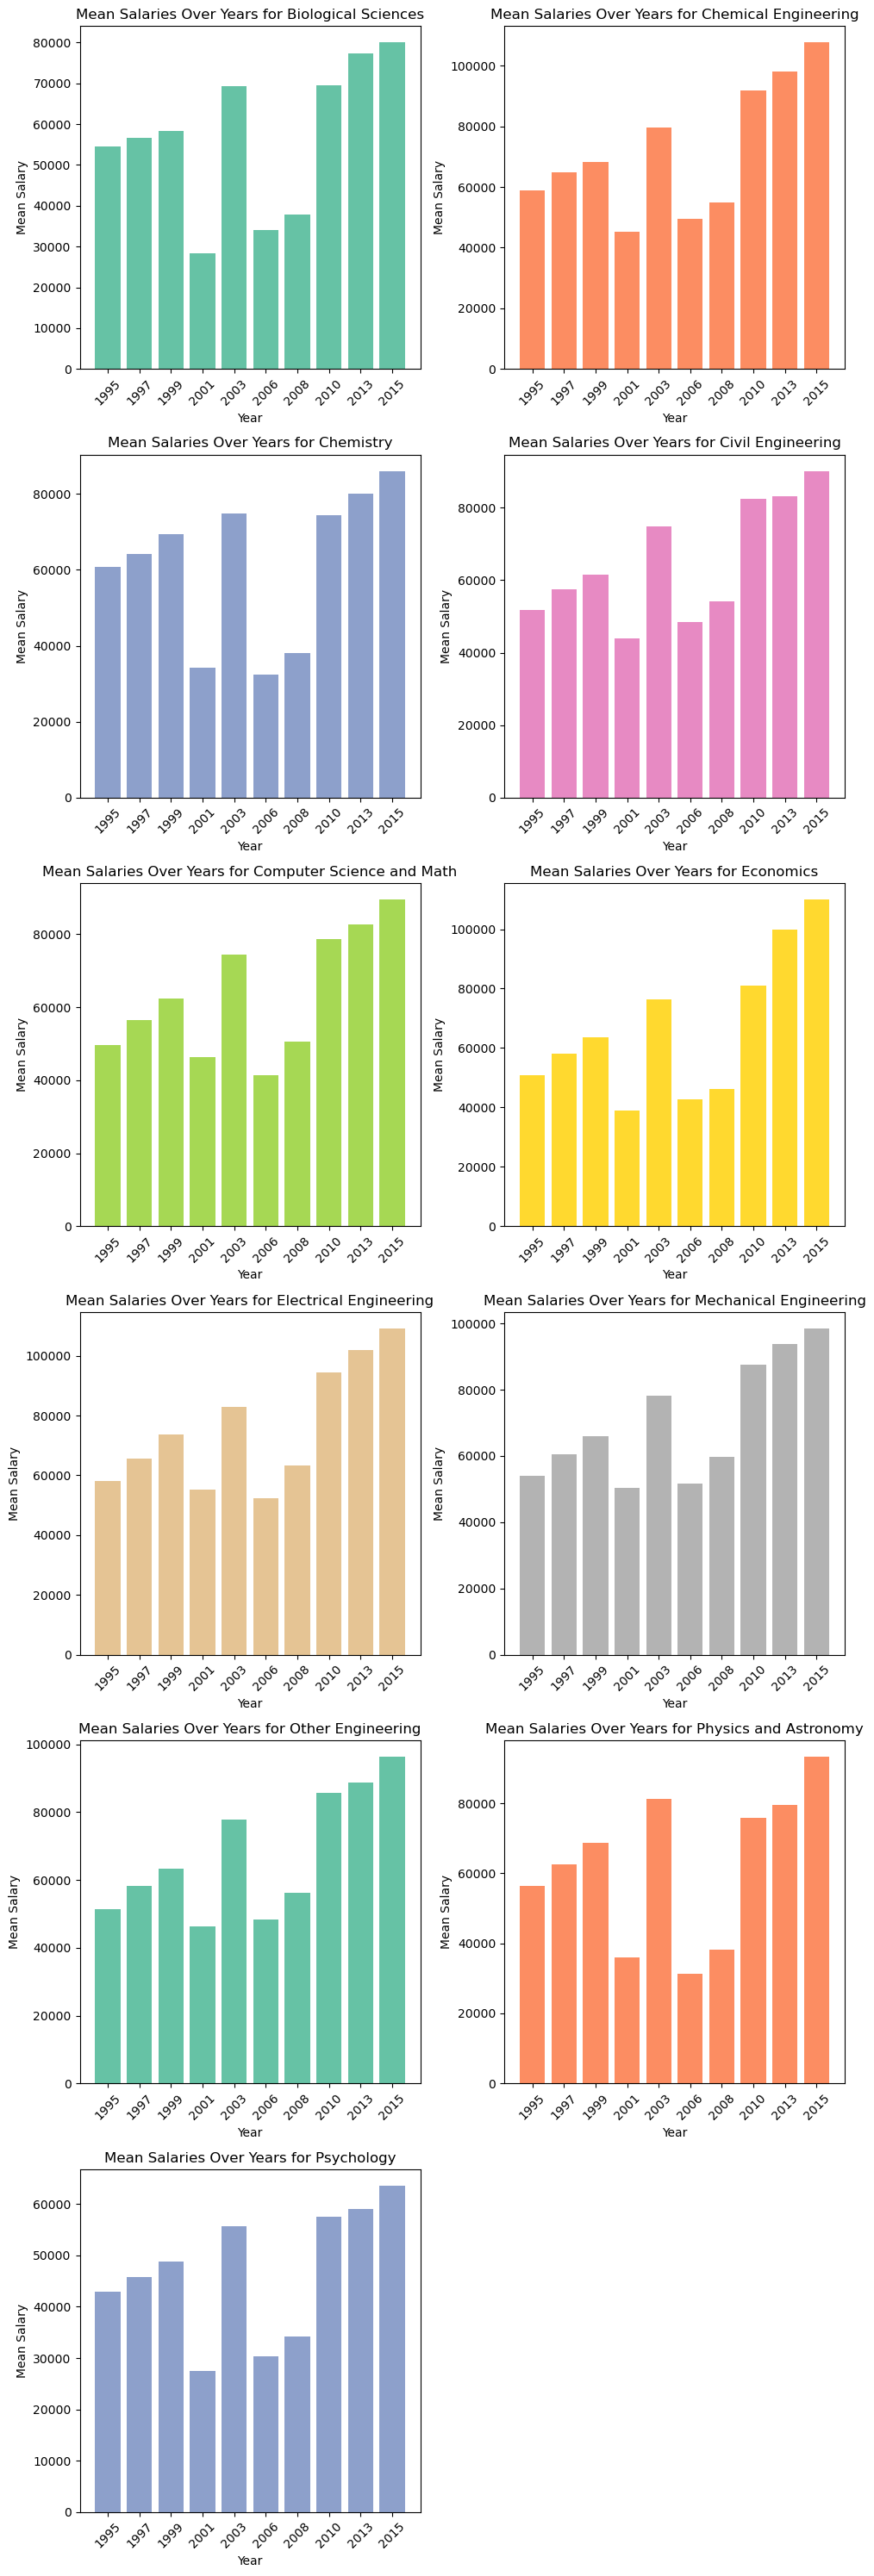

In [21]:
#Find all unique values of majors to see if there are any null entries
unique_majors = cleaned_df['Education.Major'].unique()
print(f'There are {len(unique_majors)} unique majors in this data set')

#Dictionary to hold unique data frames
filtered_dict = {}

# Filter and store the DataFrame for each major
for major in unique_majors:
    filtered_dict[major] = cleaned_df[cleaned_df['Education.Major'] == major]

# Extract the list of unique majors from the filtered dictionary
unique_majors = list(filtered_dict.keys())

# Generate a color palette with a unique color for each major
colors = sns.color_palette('Set2', len(unique_majors))

# Set up subplots grid
num_majors = len(unique_majors)  # Total number of majors
cols = 2  # Number of columns in the subplot grid
rows = (num_majors // cols) + (num_majors % cols)  # Calculate the number of rows needed

# Create the figure and axes for subplots, adjusting the figure size for vertical spacing
fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))

# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()

# Loop through each major and create a bar chart
for i, (major, data) in enumerate(filtered_dict.items()):
    # Plot the mean salaries over the years for each major
    axes[i].bar(data['Year'].astype(str), data['Salaries.Mean'], color=colors[i])
    axes[i].set_title(f'Mean Salaries Over Years for {major}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Mean Salary')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Ensure a tight layout so that subplots do not overlap
    plt.tight_layout()

# Remove any empty subplots if the number of majors is odd and leaves an extra subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout again to prevent any overlap
plt.tight_layout()

# Display the final plot with all the subplots
plt.show()

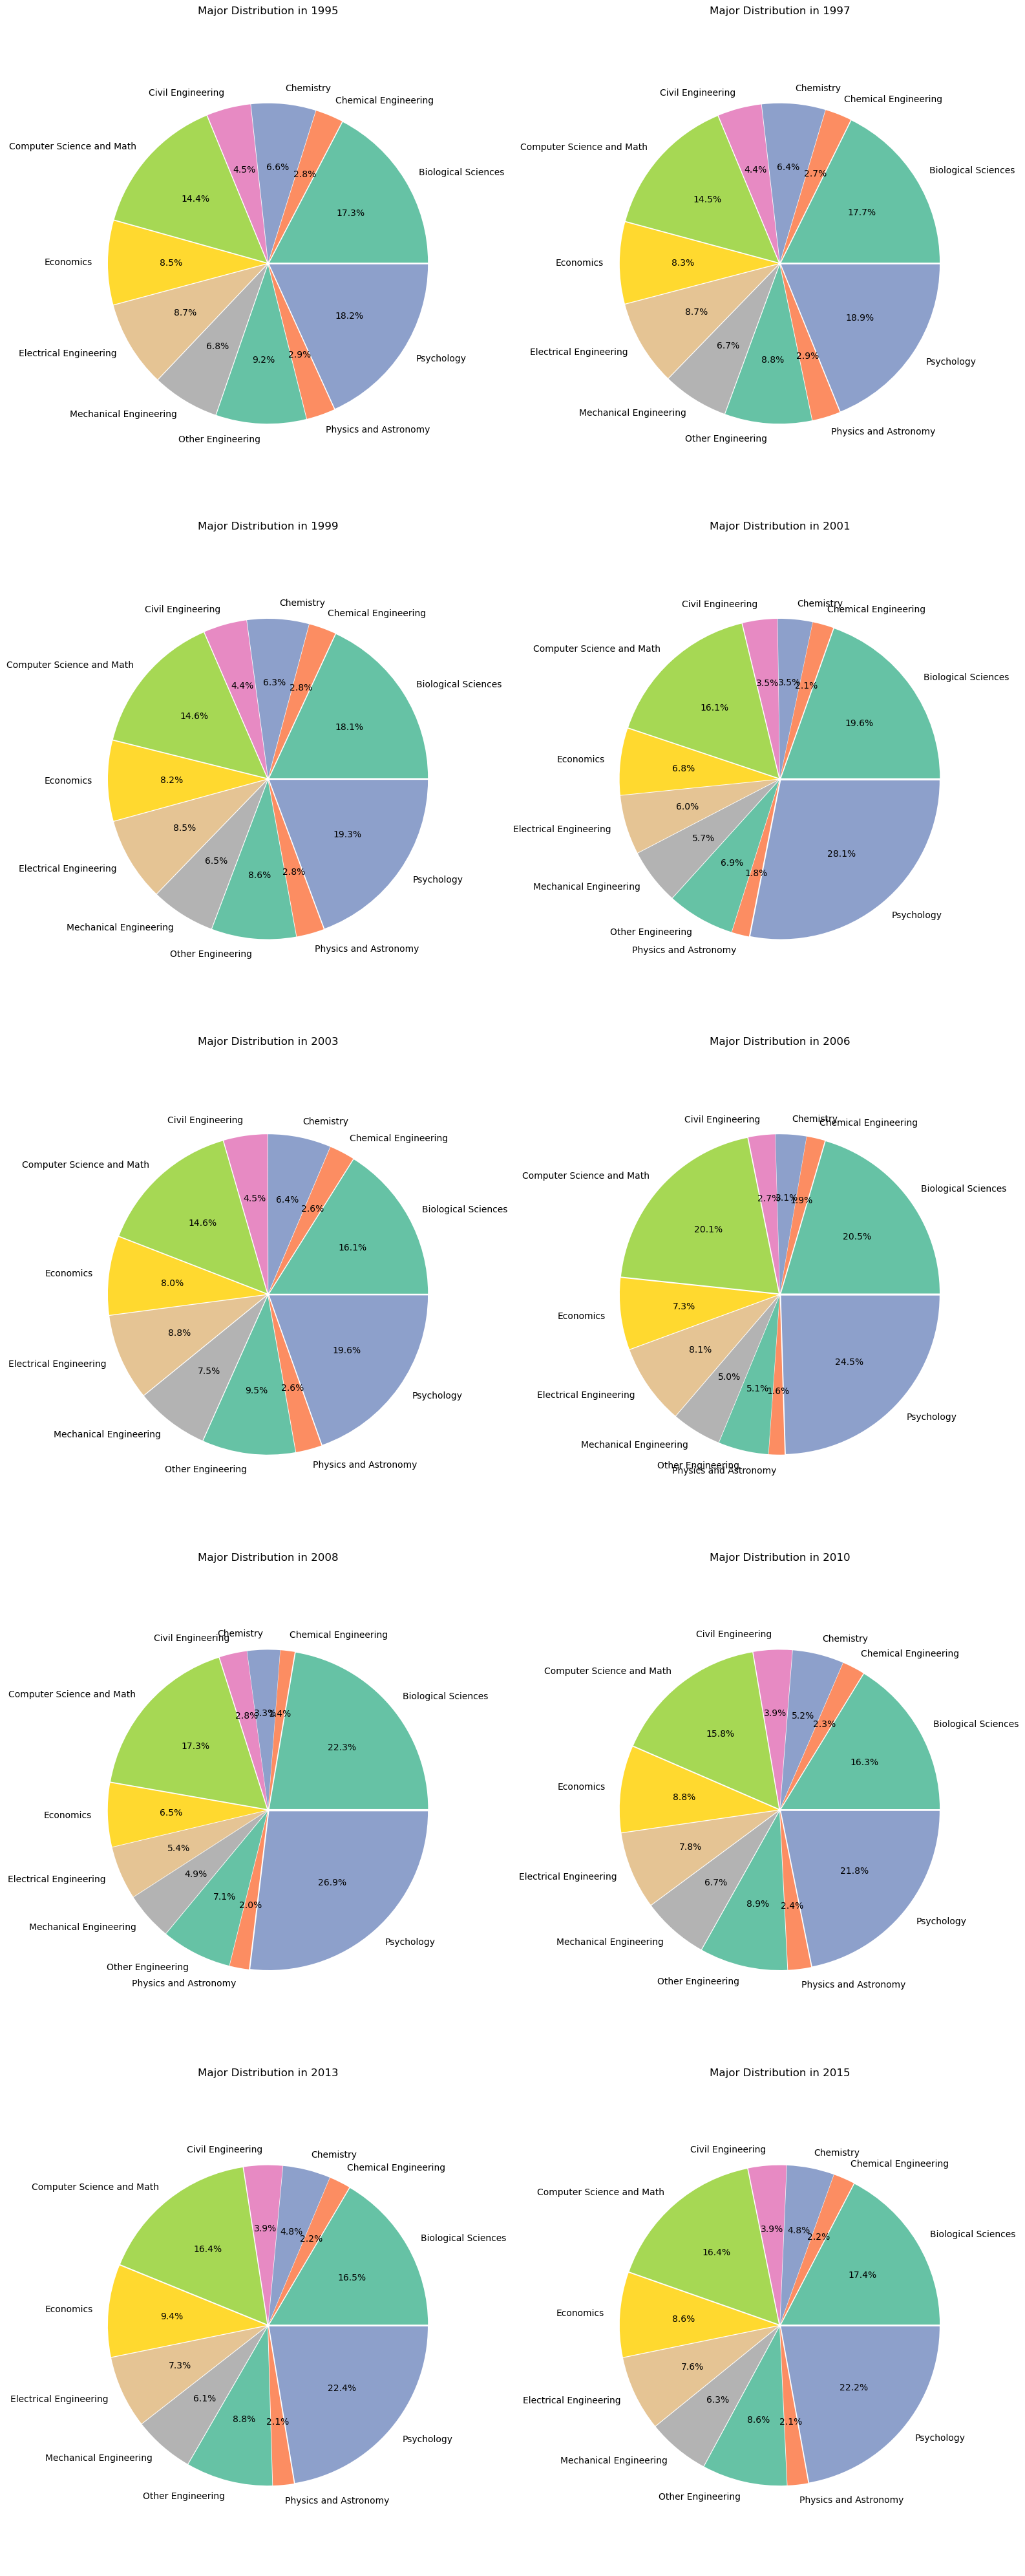

In [22]:
# Get the unique years from the cleaned dataframe
years = cleaned_df['Year'].unique()

# Generate a color palette, adjusted to match the number of unique majors
colors = sns.color_palette('Set2')[0:len(cleaned_df['Education.Major'].unique())]

# Set up subplots grid
num_years = len(years)  # Total number of unique years
cols = 2  # Number of columns in the subplot grid
rows = (num_years // cols) + (num_years % cols)  # Calculate the number of rows needed

# Create the figure and axes for subplots, adjusting the figure size for vertical spacing
fig, axes = plt.subplots(rows, cols, figsize=(16, 8 * rows))

# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()

# Loop through each year and create a pie chart
for i, year in enumerate(years):
    # Filter the dataframe for the current year
    year_df = cleaned_df[cleaned_df['Year'] == year]

    # Extract majors and their corresponding totals for the pie chart
    majors = year_df['Education.Major']
    totals = year_df['Demographics.Total']
    explode = [0.01] * len(majors)  # Slightly separate the slices for better visibility

    # Plot the pie chart in the corresponding subplot
    axes[i].pie(totals, labels=majors, explode=explode, autopct='%1.1f%%', colors=colors)
    axes[i].set_title(f'Major Distribution in {year}')
    axes[i].axis('equal')  # Ensure the pie chart is circular

# Remove any empty subplots if the number of years is odd and leaves an extra subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout again to prevent any overlap between subplots
plt.tight_layout()

# Save the final plot as an image file
plt.savefig('Resources/Pie_Charts.png')

# Display the final plot with all the pie charts
plt.show()

## Mean Salaries by Major and Aggregate over 20-year period

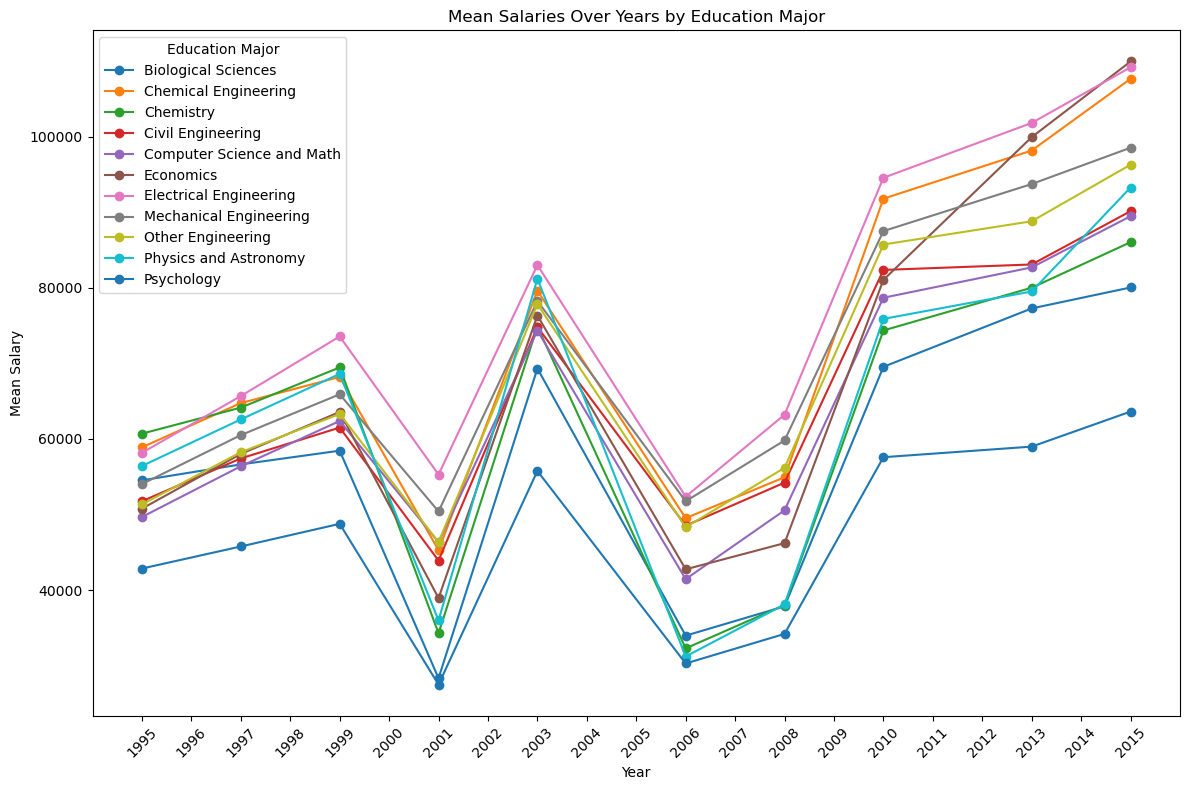

In [24]:
# Pivot the cleaned dataframe to create a DataFrame where each major is a column and each row represents a year
salaries_df = cleaned_df.pivot(index='Year', columns='Education.Major', values='Salaries.Mean')

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Loop through each major and plot its mean salary over the years
for major in salaries_df.columns:
    plt.plot(salaries_df.index, salaries_df[major], marker='o', label=major)

# Set the title and labels for the plot
plt.title('Mean Salaries Over Years by Education Major')
plt.xlabel('Year')
plt.ylabel('Mean Salary')

# Adjust the x-axis ticks to show each year, rotating the labels for better readability
plt.xticks(ticks=range(int(salaries_df.index.min()), int(salaries_df.index.max()) + 1), rotation=45)

# Add a legend to the plot with a title, placing it in the upper left corner
plt.legend(title="Education Major", loc='upper left')

# Adjust the layout to ensure everything fits without overlap
plt.tight_layout()

# Display the final plot
plt.show()

The percent change in average mean salary from 1995 to 2015 is +55.81 %


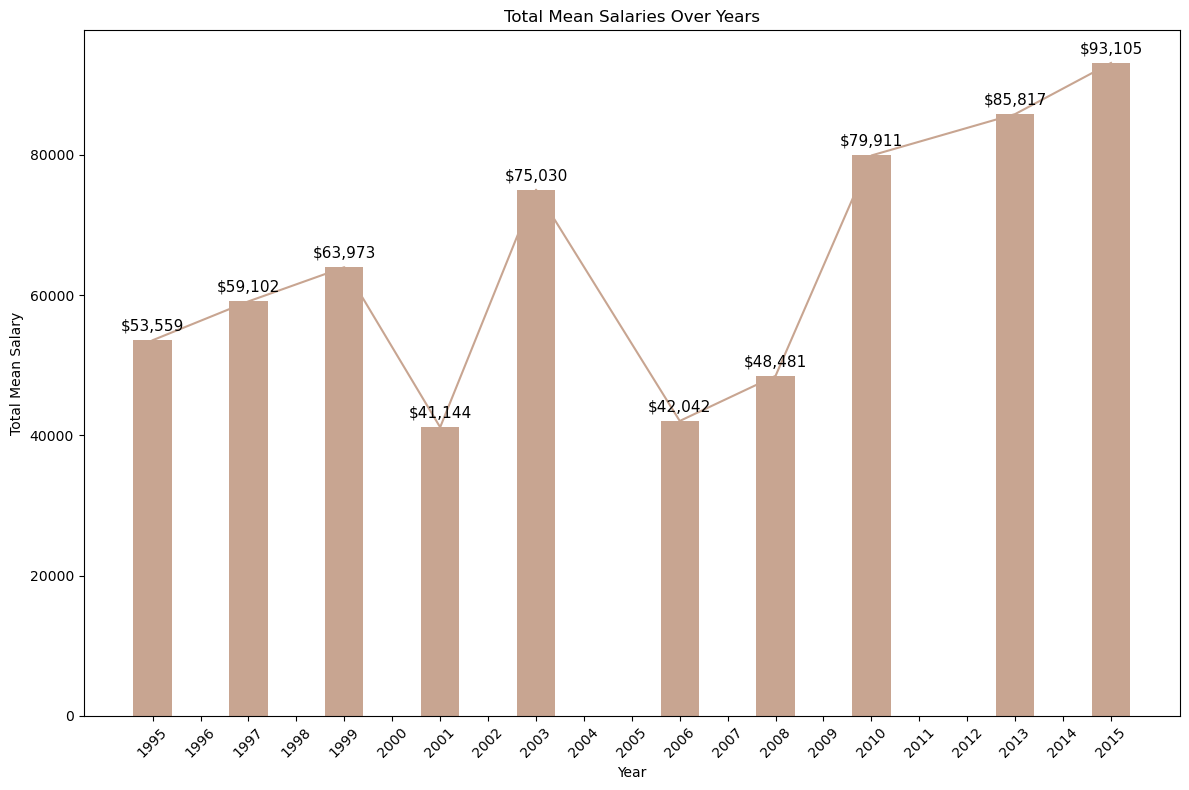

In [25]:
education_salary_df = cleaned_df.groupby('Year')['Salaries.Mean'].mean()

plt.figure(figsize=(12, 8))
plt.plot(education_salary_df.index, education_salary_df.values, color = '#c8a591ff')
plt.bar(education_salary_df.index, education_salary_df.values, color = '#c8a591ff')

for i in range(len(education_salary_df)):
    plt.text(education_salary_df.index[i], education_salary_df.values[i] + 0.01 * education_salary_df.max(), 
             f'${education_salary_df.values[i]:,.0f}', 
             ha='center', va='bottom', fontsize=11, color='black')

# Add title and labels
plt.title('Total Mean Salaries Over Years')
plt.xlabel('Year')
plt.ylabel('Total Mean Salary')
plt.xticks(ticks=range(int(education_salary_df.index.min()), int(education_salary_df.index.max()) + 1), rotation=45)

# Show the plot
sal_max = education_salary_df.max()
sal_min = education_salary_df.min()
sal_perc_change = (sal_max - sal_min)/sal_max * 100
print(f"The percent change in average mean salary from 1995 to 2015 is +{sal_perc_change:.2f} %")

plt.tight_layout()
plt.show()

## Demographic graphs for Largest and Smallest major populations: Psychology and Physics and Astronomy

In [27]:
# Keep the most popular major by filtering the dataframe for 'Psychology'
majors_to_keep = ['Psychology']

# Filter the cleaned dataframe to keep only the rows where the major is 'Psychology'
eth_df = cleaned_df[cleaned_df['Education.Major'].isin(majors_to_keep)]

# Specify the columns to retain, focusing on year, major, and ethnicity demographics
columns_to_keep = ['Year', 'Education.Major', 'Demographics.Ethnicity.Asians', 
                   'Demographics.Ethnicity.Minorities', 'Demographics.Ethnicity.Whites']

# Keep only the specified columns in the filtered dataframe
eth_df = eth_df[columns_to_keep]

# Display the resulting dataframe
eth_df.head()

,Year,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites
58,1995,Psychology,39939,146971,1217769
105,1997,Psychology,43942,168443,1307391
152,1999,Psychology,47656,184812,1386903
199,2001,Psychology,11080,31325,131360
275,2003,Psychology,67018,290544,1489303


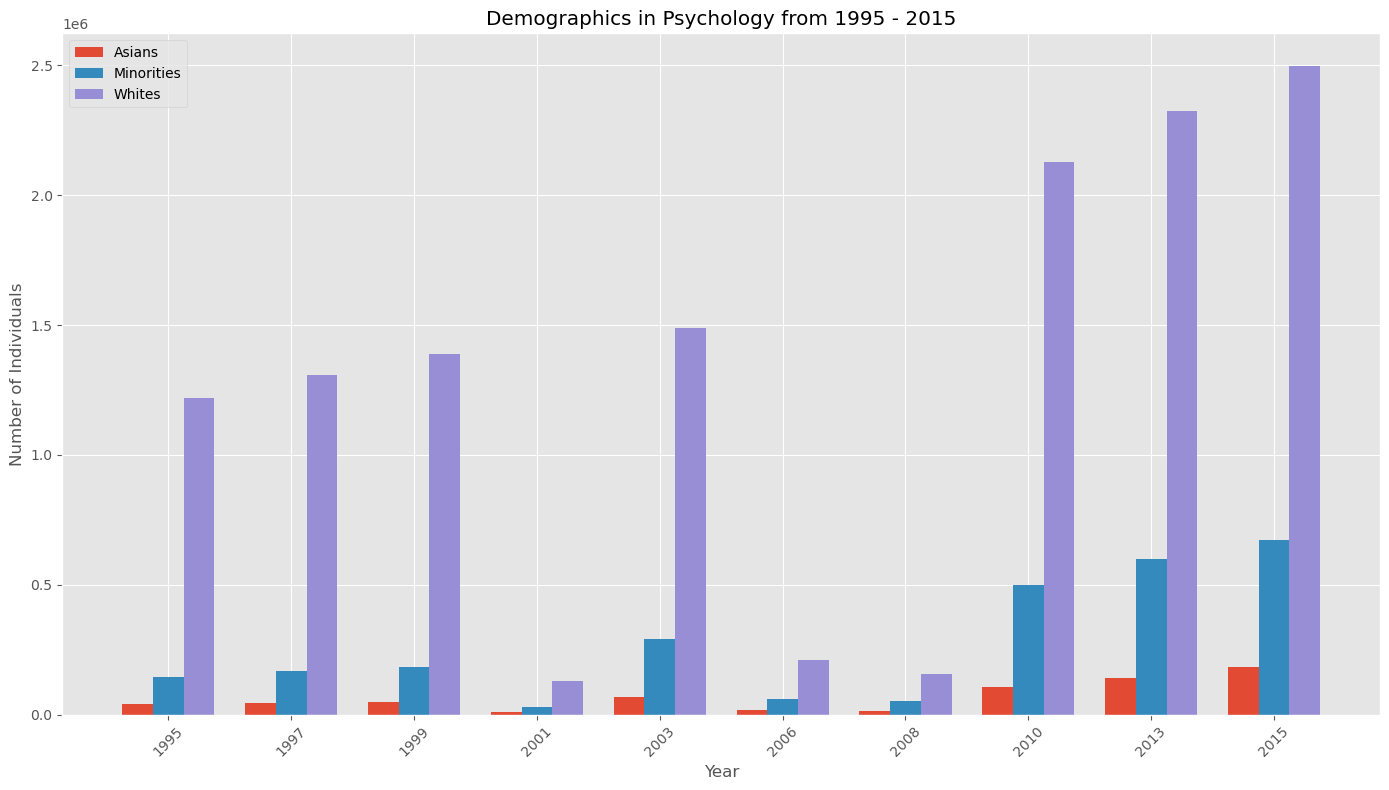

In [28]:
# Choose chart style
plt.style.use('ggplot')  # Apply the 'ggplot' style to the chart for a clean and professional look

# Create a figure for the bar chart with a specified size
plt.figure(figsize=(14, 8))

# Set the width of the bars in the bar chart
bar_width = 0.25

# Set the positions for the x-axis ticks based on the number of years in the data
index = range(len(eth_df['Year']))

# Plot the bar for the 'Asians' demographic, shifting the bars to the left
plt.bar(
    [i - bar_width for i in index], 
    eth_df['Demographics.Ethnicity.Asians'], 
    width=bar_width, 
    label='Asians'
)

# Plot the bar for the 'Minorities' demographic at the original positions
plt.bar(
    index, 
    eth_df['Demographics.Ethnicity.Minorities'], 
    width=bar_width, 
    label='Minorities'
)

# Plot the bar for the 'Whites' demographic, shifting the bars to the right
plt.bar(
    [i + bar_width for i in index], 
    eth_df['Demographics.Ethnicity.Whites'], 
    width=bar_width, 
    label='Whites'
)

# Set the title and labels for the x and y axes
plt.title('Demographics in Psychology from 1995 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')

# Set the x-axis tick labels to the years, with a 45-degree rotation for better readability
plt.xticks(index, eth_df['Year'], rotation=45)

# Add a legend to the plot to identify the different ethnicities
plt.legend()

# Adjust the layout to ensure that all elements fit without overlap
plt.tight_layout()  

# Display the final bar chart
plt.show()


In [29]:
# Keep the least popular major by filtering the dataframe for 'Physics and Astronomy'
majors_to_keep = ['Physics and Astronomy']

# Filter the cleaned dataframe to keep only the rows where the major is 'Physics and Astronomy'
eth_df = cleaned_df[cleaned_df['Education.Major'].isin(majors_to_keep)]

# Specify the columns to retain, focusing on year, major, and ethnicity demographics
columns_to_keep = ['Year', 'Education.Major', 'Demographics.Ethnicity.Asians', 
                   'Demographics.Ethnicity.Minorities', 'Demographics.Ethnicity.Whites']

# Keep only the specified columns in the filtered dataframe
eth_df = eth_df[columns_to_keep]

# Display the first few rows of the resulting dataframe to verify the data
eth_df.head()


,Year,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites
57,1995,Physics and Astronomy,26353,10632,186866
104,1997,Physics and Astronomy,29034,11888,189011
151,1999,Physics and Astronomy,29681,11450,193725
198,2001,Physics and Astronomy,2245,901,7791
271,2003,Physics and Astronomy,54924,14544,179027


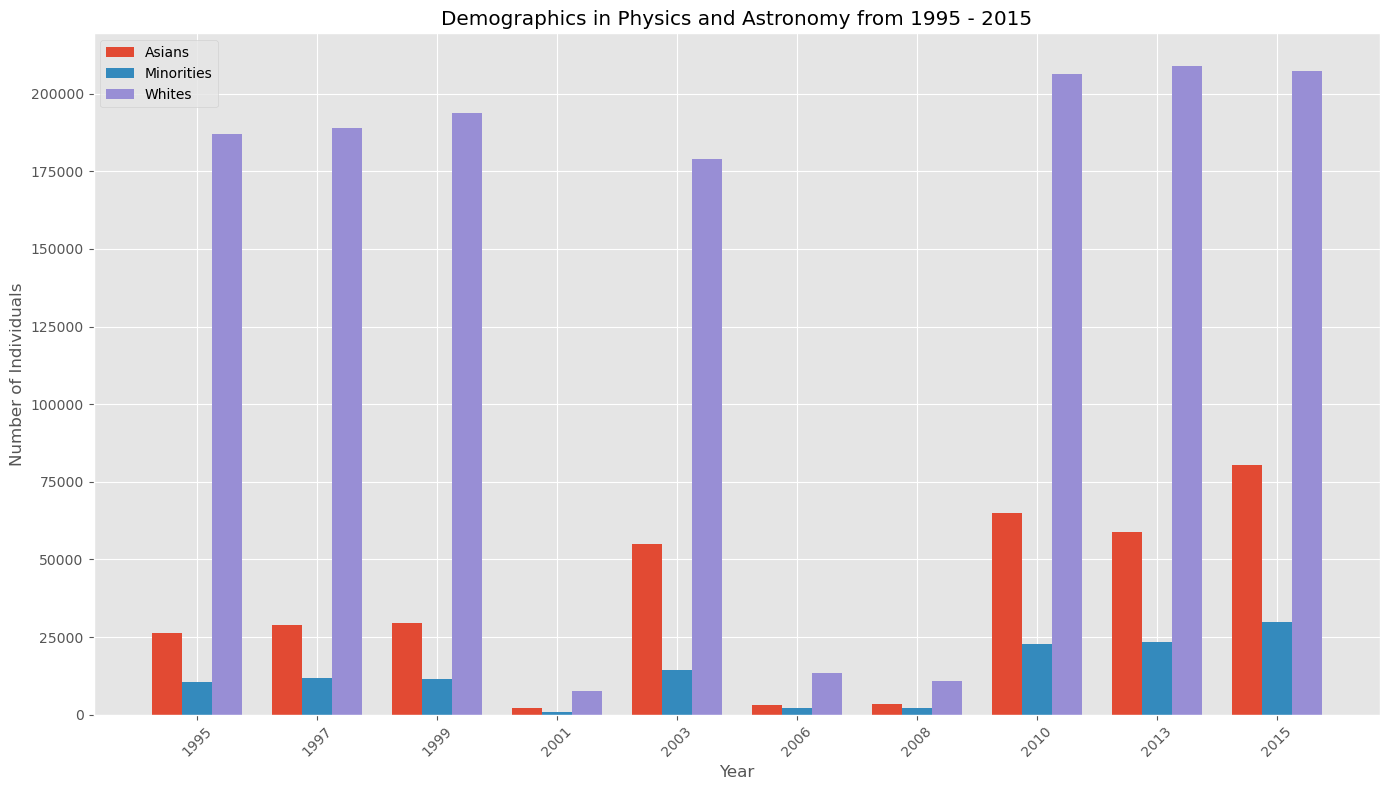

In [30]:
# Choose chart style
plt.style.use('ggplot')  # Apply the 'ggplot' style to the chart for a clean and professional appearance

# Create a figure for the bar chart with a specified size
plt.figure(figsize=(14, 8))

# Set the width of the bars in the bar chart
bar_width = 0.25

# Set the positions for the x-axis ticks based on the number of years in the data
index = range(len(eth_df['Year']))

# Plot the bar for the 'Asians' demographic, shifting the bars to the left
plt.bar(
    [i - bar_width for i in index], 
    eth_df['Demographics.Ethnicity.Asians'], 
    width=bar_width, 
    label='Asians'
)

# Plot the bar for the 'Minorities' demographic at the original positions
plt.bar(
    index, 
    eth_df['Demographics.Ethnicity.Minorities'], 
    width=bar_width, 
    label='Minorities'
)

# Plot the bar for the 'Whites' demographic, shifting the bars to the right
plt.bar(
    [i + bar_width for i in index], 
    eth_df['Demographics.Ethnicity.Whites'], 
    width=bar_width, 
    label='Whites'
)

# Set the title and labels for the x and y axes
plt.title('Demographics in Physics and Astronomy from 1995 - 2015')
plt.xlabel('Year')
plt.ylabel('Number of Individuals')

# Set the x-axis tick labels to the years, with a 45-degree rotation for better readability
plt.xticks(index, eth_df['Year'], rotation=45)

# Add a legend to the plot to identify the different ethnicities
plt.legend()

# Adjust the layout to ensure that all elements fit without overlap
plt.tight_layout()

# Display the final bar chart
plt.show()

## Demographic distribution for all majors throughout 20-year period

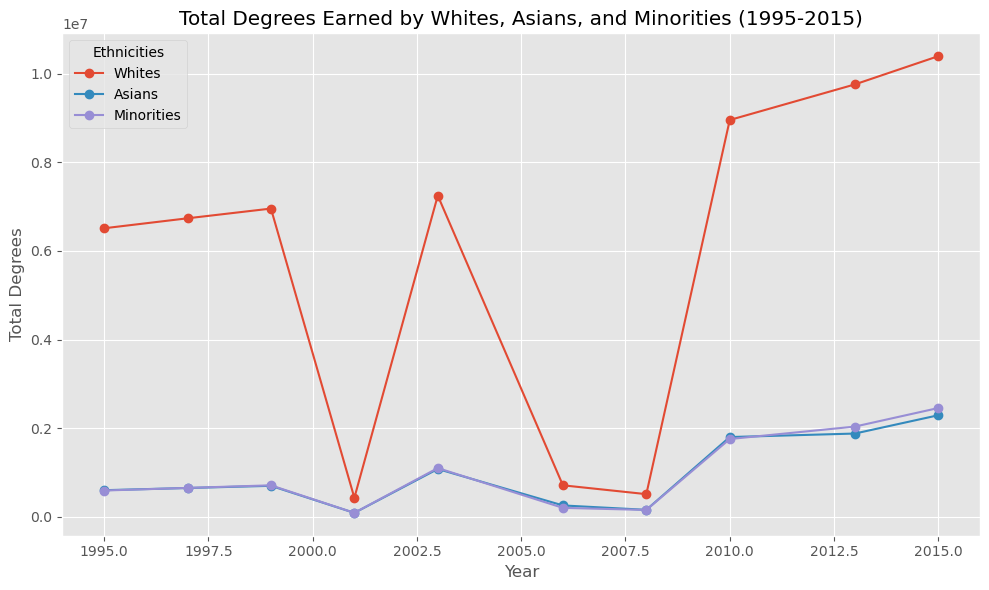

In [32]:
# Aggregate total degrees earned by each ethnicity per year
ethnic_totals = cleaned_df.groupby('Year').agg({
    'Demographics.Ethnicity.Whites': 'sum',        # Sum of degrees earned by Whites
    'Demographics.Ethnicity.Asians': 'sum',        # Sum of degrees earned by Asians
    'Demographics.Ethnicity.Minorities': 'sum'     # Sum of degrees earned by Minorities
}).reset_index()  # Reset index to make 'Year' a column

# Create a figure for the line plot with a specified size
plt.figure(figsize=(10, 6))

# Plot the total degrees earned by Whites over the years
plt.plot(ethnic_totals['Year'], ethnic_totals['Demographics.Ethnicity.Whites'], label='Whites', marker='o')

# Plot the total degrees earned by Asians over the years
plt.plot(ethnic_totals['Year'], ethnic_totals['Demographics.Ethnicity.Asians'], label='Asians', marker='o')

# Plot the total degrees earned by Minorities over the years
plt.plot(ethnic_totals['Year'], ethnic_totals['Demographics.Ethnicity.Minorities'], label='Minorities', marker='o')

# Set the title and labels for the x and y axes
plt.title('Total Degrees Earned by Whites, Asians, and Minorities (1995-2015)')
plt.xlabel('Year')
plt.ylabel('Total Degrees')

# Add a legend to identify the different ethnicities
plt.legend(title='Ethnicities')

# Add gridlines for better readability
plt.grid(True)

# Adjust the layout to ensure that all elements fit without overlap
plt.tight_layout()

# Display the final line plot
plt.show()

## Degrees earned by sex throughout 20-year period

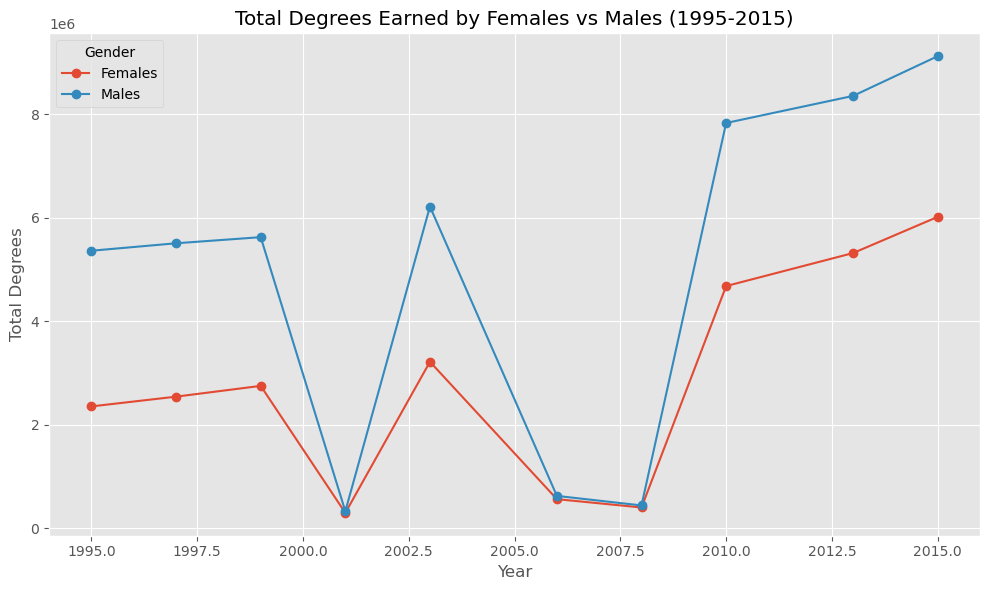

In [34]:
#Men vs Women salaries throughout the years
#Demographics.Gender.Males
#Demographics.Gender.Females

gender_totals = cleaned_df.groupby('Year').agg({
    'Demographics.Gender.Females': 'sum',
    'Demographics.Gender.Males': 'sum'
}).reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(gender_totals['Year'], gender_totals['Demographics.Gender.Females'],label='Females', marker='o')
plt.plot(gender_totals['Year'], gender_totals['Demographics.Gender.Males'],label='Males', marker='o')

plt.title('Total Degrees Earned by Females vs Males (1995-2015)')
plt.xlabel('Year')
plt.ylabel('Total Degrees')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

## Degrees earned by level of education

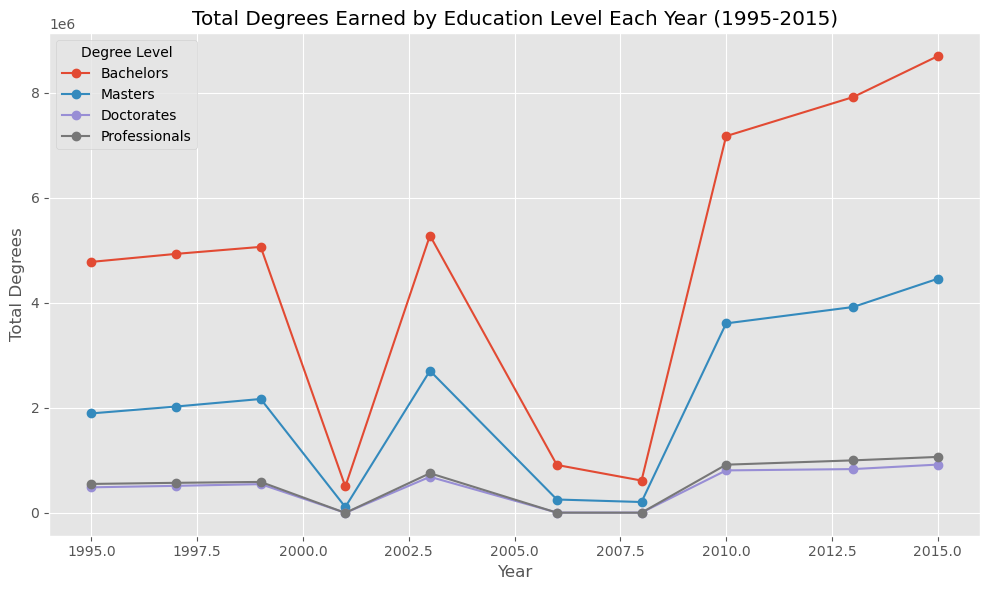

In [36]:
# Aggregate total degrees earned by each education level per year
degrees_types_totals = cleaned_df.groupby('Year').agg({
    'Education.Degrees.Bachelors': 'sum',        # Sum of Bachelor's degrees earned
    'Education.Degrees.Masters': 'sum',          # Sum of Master's degrees earned
    'Education.Degrees.Doctorates': 'sum',       # Sum of Doctorates earned
    'Education.Degrees.Professionals': 'sum'     # Sum of Professional degrees earned
}).reset_index()  # Reset index to make 'Year' a column

# Create a figure for the line plot with a specified size
plt.figure(figsize=(10, 6))

# Plot the total Bachelor's degrees earned over the years
plt.plot(degrees_types_totals['Year'], degrees_types_totals['Education.Degrees.Bachelors'], label='Bachelors', marker='o')

# Plot the total Master's degrees earned over the years
plt.plot(degrees_types_totals['Year'], degrees_types_totals['Education.Degrees.Masters'], label='Masters', marker='o')

# Plot the total Doctorates earned over the years
plt.plot(degrees_types_totals['Year'], degrees_types_totals['Education.Degrees.Doctorates'], label='Doctorates', marker='o')

# Plot the total Professional degrees earned over the years
plt.plot(degrees_types_totals['Year'], degrees_types_totals['Education.Degrees.Professionals'], label='Professionals', marker='o')

# Set the title and labels for the x and y axes
plt.title('Total Degrees Earned by Education Level Each Year (1995-2015)')
plt.xlabel('Year')
plt.ylabel('Total Degrees')

# Add a legend to identify the different degree levels
plt.legend(title='Degree Level')

# Add gridlines for better readability
plt.grid(True)

# Adjust the layout to ensure that all elements fit without overlap
plt.tight_layout()

# Display the final line plot
plt.show()

## Average salaries based on major density

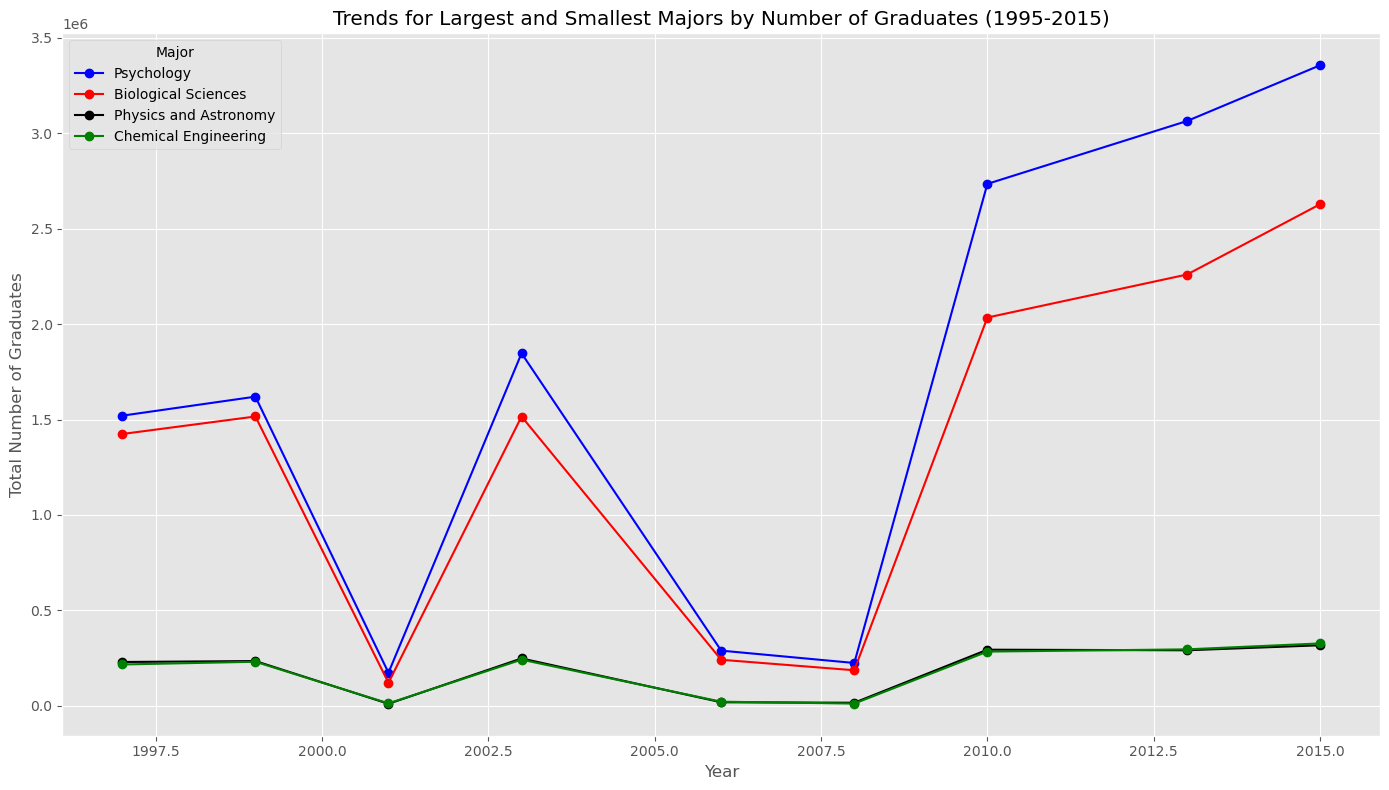

In [167]:
# Filter the cleaned dataframe to include only data from 1995 to 2015
pop_df = cleaned_df[(cleaned_df['Year'] >= 1995) & (cleaned_df['Year'] <= 2015)]

# Aggregate data by major to calculate the total number of graduates
major_popularity_df = pop_df.groupby(['Education.Major']).agg({
    'Demographics.Total': 'sum'  # Sum the total number of graduates for each major
}).reset_index()  # Reset index to make 'Education.Major' a column

# Sort the majors by the total number of graduates in descending order
sorted_majors = major_popularity_df.sort_values(by='Demographics.Total', ascending=False)

# Identify the two largest and two smallest majors based on the total number of graduates
largest_majors = sorted_majors.head(2)['Education.Major']
smallest_majors = sorted_majors.tail(2)['Education.Major']

# Combine the largest and smallest majors into a single series
selected_majors = pd.concat([largest_majors, smallest_majors])

# Define a color palette for plotting
colors = { 'Psychology': 'blue','Chemical Engineering': 'green','Physics and Astronomy':'black',
            'Biological Sciences':'red'}

# Create a figure for the line plot with a specified size
plt.figure(figsize=(14, 8))

# Plot data for each selected major
for i, major in enumerate(selected_majors):
    major_data = pop_df[pop_df['Education.Major'] == major]  # Filter data for the current major
    plt.plot(major_data['Year'], major_data['Demographics.Total'], marker='o', label=major, color = colors[major])

# Set the title and labels for the x and y axes
plt.title('Trends for Largest and Smallest Majors by Number of Graduates (1995-2015)')
plt.xlabel('Year')
plt.ylabel('Total Number of Graduates')

# Add a legend to identify each major, placing it outside the plot area
plt.legend(title='Major', loc='upper left')

# Add gridlines for better readability
plt.grid(True)

# Adjust the layout to ensure that all elements fit without overlap
plt.tight_layout()

# Display the final line plot
plt.show()

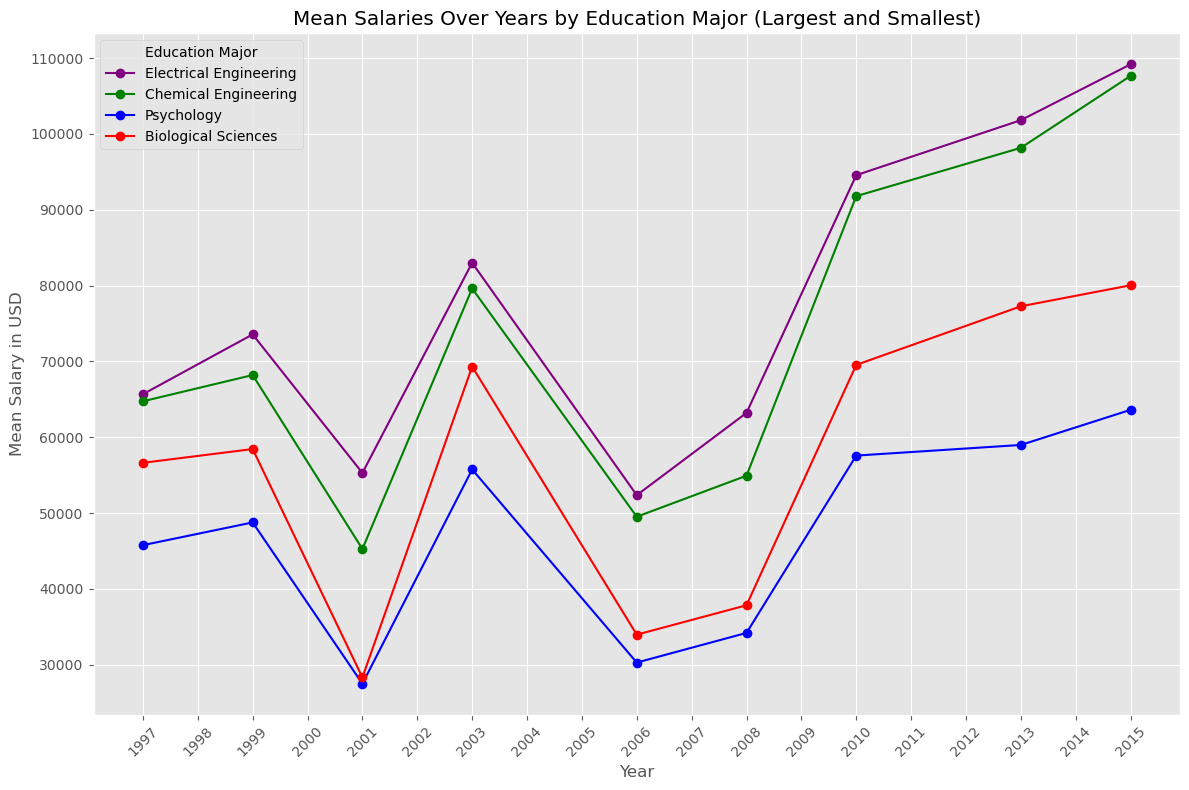

In [171]:
# Pivot the dataframe to create a table with years as rows and majors as columns, showing mean salaries
salaries_2_df = cleaned_df.pivot(index='Year', columns='Education.Major', values='Salaries.Mean')

# Calculate the average mean salary across all years for each major
average_salaries = salaries_2_df.mean()

# Identify the two majors with the highest average salaries
largest_two_majors = average_salaries.nlargest(2).index

# Identify the two majors with the lowest average salaries
smallest_two_majors = average_salaries.nsmallest(2).index

# Combine the largest and smallest majors into a single list
selected_majors = list(largest_two_majors) + list(smallest_two_majors)
# Create a figure for the line plot with a specified size
plt.figure(figsize=(12, 8))
colors = { 'Psychology': 'blue','Chemical Engineering': 'green','Electrical Engineering':'purple',
            'Biological Sciences':'red'}

# Plot the mean salary data for each selected major
for major in selected_majors:
    plt.plot(salaries_2_df.index, salaries_2_df[major], marker='o', label=major, color = colors[major])

# Set the title and labels for the x and y axes
plt.title('Mean Salaries Over Years by Education Major (Largest and Smallest)')
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')

# Set the x-axis ticks to match the years in the data, rotating them for better readability
plt.xticks(ticks=range(int(salaries_2_df.index.min()), int(salaries_2_df.index.max()) + 1), rotation=45)

# Add a legend to identify each major
plt.legend(title="Education Major", loc='upper left')

# Adjust the layout to ensure that all elements fit without overlap
plt.tight_layout()

# Display the final line plot
plt.show()


## Cost of tuition across 20-year period

The percent change in cost of total tuition from 1995 to 2015 is +39.52 %


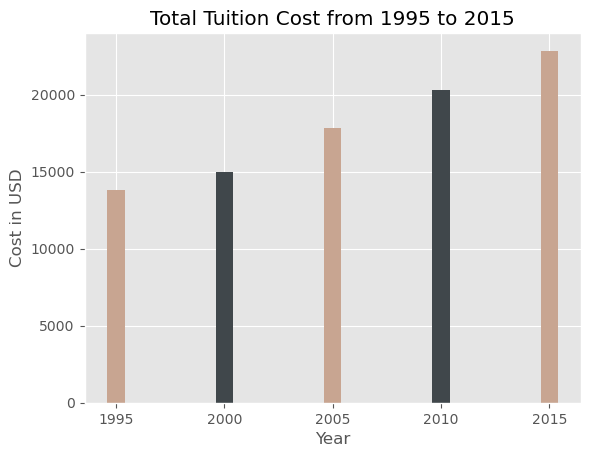

In [41]:
# Select relevant columns ('Year' and 'Total tuition') from the tuition cost DataFrame
tuition_year = tuition_cost_df[['Year', 'Total tuition']]

# Filter the DataFrame to include only the years 1995, 2000, 2005, 2010, and 2015
tuition_filter = tuition_year[tuition_year['Year'].isin([1995, 2000, 2005, 2010, 2015])][['Year', 'Total tuition']]

# Create a bar plot to visualize the total tuition cost for the selected years
plt.bar(tuition_filter['Year'], tuition_filter['Total tuition'], color=['#c8a591ff', '#40474b'])

# Set the title and labels for the x and y axes
plt.title("Total Tuition Cost from 1995 to 2015")
plt.xlabel("Year")
plt.ylabel("Cost in USD")

# Calculate the percent change in total tuition cost from 1995 to 2015
tuit_2015 = tuition_filter['Total tuition'].max()  # Tuition cost in 2015
tuit_1995 = tuition_filter['Total tuition'].min()  # Tuition cost in 1995
percent_change = (tuit_2015 - tuit_1995) / tuit_2015 * 100  # Percent change calculation

# Print the percent change in tuition cost from 1995 to 2015
print(f"The percent change in cost of total tuition from 1995 to 2015 is +{percent_change:.2f} %")

# Display the bar plot
plt.show()

The percent change in cost of total tuition for Public Institutions from 1995 to 2015 is +42.46 %


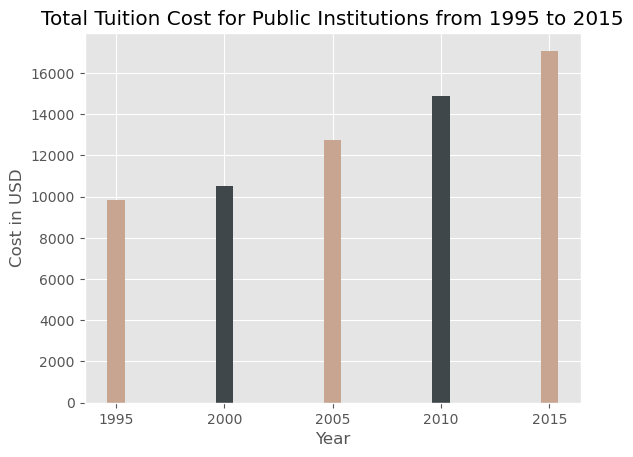

In [42]:
# Select relevant columns ('Year' and 'Public Tuition') from the tuition cost DataFrame
public_tuition = tuition_cost_df[['Year', 'Public Tuition']]

# Filter the DataFrame to include only the years 1995, 2000, 2005, 2010, and 2015
public_filter = public_tuition[public_tuition['Year'].isin([1995, 2000, 2005, 2010, 2015])][['Year', 'Public Tuition']]

# Create a bar plot to visualize the public tuition cost for the selected years
plt.bar(public_filter['Year'], public_filter['Public Tuition'], color=['#c8a591ff', '#40474b'])

# Set the title and labels for the x and y axes
plt.title("Total Tuition Cost for Public Institutions from 1995 to 2015")
plt.xlabel("Year")
plt.ylabel("Cost in USD")

# Calculate the percent change in public tuition cost from 1995 to 2015
pub_2015 = public_filter['Public Tuition'].max()  # Public tuition cost in 2015
pub_1995 = public_filter['Public Tuition'].min()  # Public tuition cost in 1995
pub_perc_change = (pub_2015 - pub_1995) / pub_2015 * 100  # Percent change calculation

# Print the percent change in public tuition cost from 1995 to 2015
print(f"The percent change in cost of total tuition for Public Institutions from 1995 to 2015 is +{pub_perc_change:.2f} %")

# Display the bar plot
plt.show()

The percent change in cost of total tuition for Private Institutions from 1995 to 2015 is +31.98 %


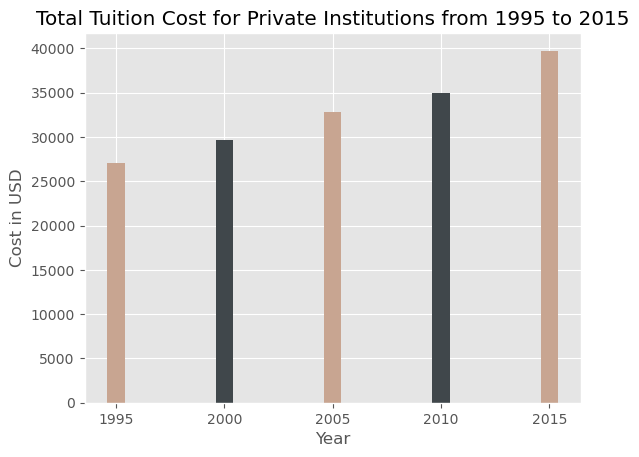

In [43]:
# Select relevant columns ('Year' and 'Private Tuition') from the tuition cost DataFrame
priv_tuition = tuition_cost_df[['Year', 'Private Tuition']]

# Filter the DataFrame to include only the years 1995, 2000, 2005, 2010, and 2015
priv_filter = priv_tuition[priv_tuition['Year'].isin([1995, 2000, 2005, 2010, 2015])][['Year', 'Private Tuition']]

# Create a bar plot to visualize the private tuition cost for the selected years
plt.bar(priv_filter['Year'], priv_filter['Private Tuition'], color=['#c8a591ff', '#40474b'])

# Set the title and labels for the x and y axes
plt.title("Total Tuition Cost for Private Institutions from 1995 to 2015")
plt.xlabel("Year")
plt.ylabel("Cost in USD")

# Calculate the percent change in private tuition cost from 1995 to 2015
priv_2015 = priv_filter['Private Tuition'].max()  # Private tuition cost in 2015
priv_1995 = priv_filter['Private Tuition'].min()  # Private tuition cost in 1995
priv_perc_change = (priv_2015 - priv_1995) / priv_2015 * 100  # Percent change calculation

# Print the percent change in private tuition cost from 1995 to 2015
print(f"The percent change in cost of total tuition for Private Institutions from 1995 to 2015 is +{priv_perc_change:.2f} %")

# Display the bar plot
plt.show()

## Quartiles, Outliers, IQR, and Box & Whisker Graphs for every single column in the data set 

Biological Sciences: Series([], Name: Salaries.Mean, dtype: float64)
Chemical Engineering: Series([], Name: Salaries.Mean, dtype: float64)
Chemistry: Series([], Name: Salaries.Mean, dtype: float64)
Civil Engineering: Series([], Name: Salaries.Mean, dtype: float64)
Computer Science and Math: Series([], Name: Salaries.Mean, dtype: float64)
Economics: Series([], Name: Salaries.Mean, dtype: float64)
Electrical Engineering: Series([], Name: Salaries.Mean, dtype: float64)
Mechanical Engineering: Series([], Name: Salaries.Mean, dtype: float64)
Other Engineering: Series([], Name: Salaries.Mean, dtype: float64)
Physics and Astronomy: Series([], Name: Salaries.Mean, dtype: float64)
Psychology: Series([], Name: Salaries.Mean, dtype: float64)


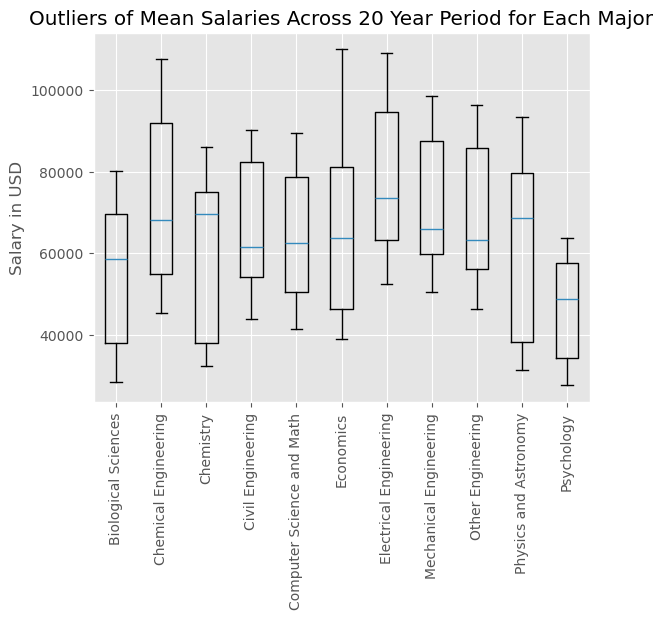

In [129]:
# Initialize an empty list to store the mean salaries for each major
mean_salaries = []

# Collect the mean salaries for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Salaries.Mean' column
    final_salaries_mean = cleaned_df[cleaned_df['Education.Major'] == major]['Salaries.Mean']
    # Append the Series of mean salaries to the list
    mean_salaries.append(final_salaries_mean)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = mean_salaries[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = mean_salaries[i][(mean_salaries[i] < lower_bound) | (mean_salaries[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the mean salaries across all majors
fig, ax = plt.subplots()
ax.boxplot(mean_salaries, labels=unique_majors, flierprops=flierprops)

# Set the x-axis labels to be rotated for better readability
ax.set_xticklabels(unique_majors, rotation=90)
plt.title('Outliers of Mean Salaries Across 20 Year Period for Each Major')
plt.ylabel('Salary in USD')
# Display the plot
plt.show()

Biological Sciences: Series([], Name: Salaries.Median, dtype: int64)
Chemical Engineering: Series([], Name: Salaries.Median, dtype: int64)
Chemistry: Series([], Name: Salaries.Median, dtype: int64)
Civil Engineering: Series([], Name: Salaries.Median, dtype: int64)
Computer Science and Math: Series([], Name: Salaries.Median, dtype: int64)
Economics: Series([], Name: Salaries.Median, dtype: int64)
Electrical Engineering: Series([], Name: Salaries.Median, dtype: int64)
Mechanical Engineering: Series([], Name: Salaries.Median, dtype: int64)
Other Engineering: Series([], Name: Salaries.Median, dtype: int64)
Physics and Astronomy: Series([], Name: Salaries.Median, dtype: int64)
Psychology: Series([], Name: Salaries.Median, dtype: int64)


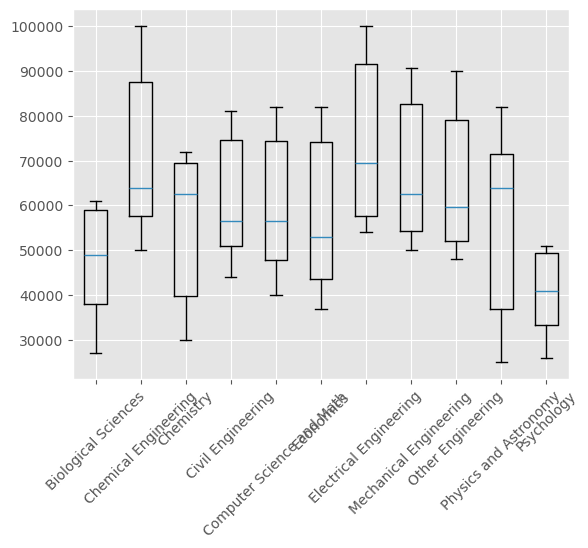

In [46]:
# Initialize an empty list to store the median salaries for each major
median_salaries = []

# Collect the median salaries for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Salaries.Median' column
    final_salaries_median = cleaned_df[cleaned_df['Education.Major'] == major]['Salaries.Median']
    # Append the Series of median salaries to the list
    median_salaries.append(final_salaries_median)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = median_salaries[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = median_salaries[i][(median_salaries[i] < lower_bound) | (median_salaries[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the median salaries across all majors
fig, ax = plt.subplots()
ax.boxplot(median_salaries, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Biological Sciences: Series([], Name: Salaries.Quantity, dtype: int64)
Chemical Engineering: Series([], Name: Salaries.Quantity, dtype: int64)
Chemistry: Series([], Name: Salaries.Quantity, dtype: int64)
Civil Engineering: Series([], Name: Salaries.Quantity, dtype: int64)
Computer Science and Math: Series([], Name: Salaries.Quantity, dtype: int64)
Economics: Series([], Name: Salaries.Quantity, dtype: int64)
Electrical Engineering: Series([], Name: Salaries.Quantity, dtype: int64)
Mechanical Engineering: Series([], Name: Salaries.Quantity, dtype: int64)
Other Engineering: Series([], Name: Salaries.Quantity, dtype: int64)
Physics and Astronomy: Series([], Name: Salaries.Quantity, dtype: int64)
Psychology: Series([], Name: Salaries.Quantity, dtype: int64)


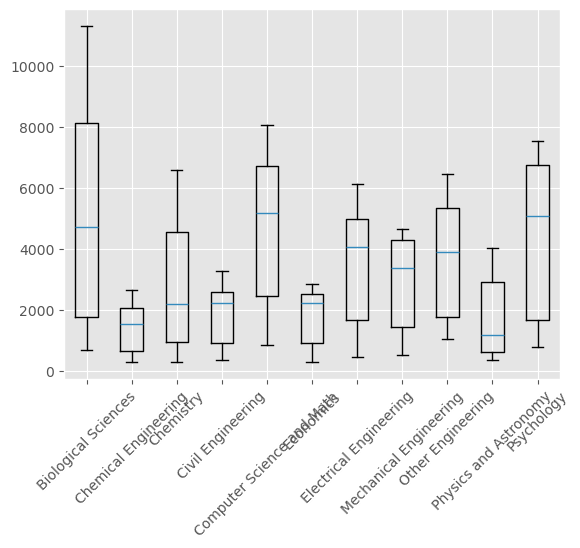

In [47]:
# Initialize an empty list to store the quantities of salaries for each major
salaries_quantity = []

# Collect the salary quantities for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Salaries.Quantity' column
    final_salaries_quantity = cleaned_df[cleaned_df['Education.Major'] == major]['Salaries.Quantity']
    # Append the Series of salary quantities to the list
    salaries_quantity.append(final_salaries_quantity)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = salaries_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = salaries_quantity[i][(salaries_quantity[i] < lower_bound) | (salaries_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the salary quantities across all majors
fig, ax = plt.subplots()
ax.boxplot(salaries_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Chemical Engineering: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Chemistry: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Civil Engineering: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Computer Science and Math: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Economics: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Electrical Engineering: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Mechanical Engineering: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Other Engineering: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Physics and Astronomy: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)
Psychology: Series([], Name: Demographics.Ethnicity.Asians, dtype: int64)


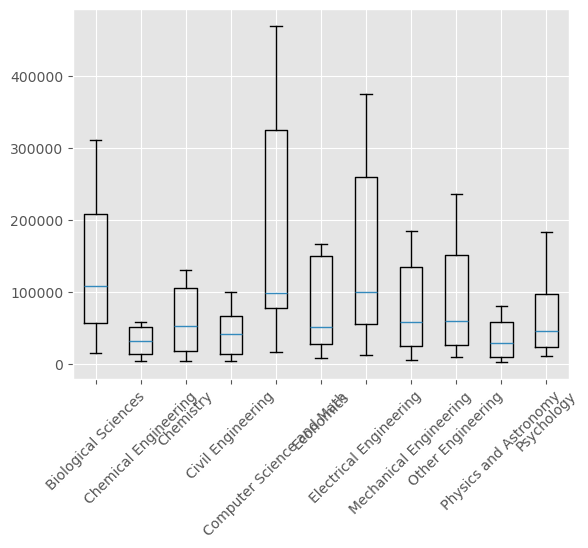

In [48]:
asian_quantity = []

for major in unique_majors:
    asian_demographics = cleaned_df[cleaned_df['Education.Major'] == major]['Demographics.Ethnicity.Asians']
    asian_quantity.append(asian_demographics)

for i, major in enumerate(unique_majors):
    quartiles = asian_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    inter_quartile_range = upperquartile - lowerquartile
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)
    upper_bound = upperquartile + (1.5 * inter_quartile_range)
    possible_outliers = asian_quantity[i][(asian_quantity[i]<lower_bound) | (asian_quantity[i]>upper_bound)]
    print(f"{major}: {possible_outliers}")     

flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(asian_quantity, labels=majors, flierprops=flierprops)
plt.xticks(rotation=45)
plt.show()

Biological Sciences: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Chemical Engineering: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Chemistry: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Civil Engineering: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Computer Science and Math: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Economics: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Electrical Engineering: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Mechanical Engineering: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Other Engineering: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Physics and Astronomy: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)
Psychology: Series([], Name: Demographics.Ethnicity.Minorities, dtype: int64)


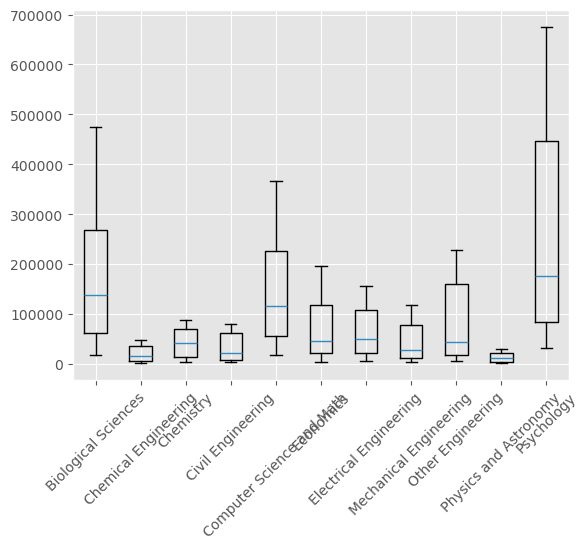

In [49]:
# Initialize an empty list to store the demographics of minorities for each major
demographics_minorities_quantity = []

# Collect the number of minorities for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Demographics.Ethnicity.Minorities' column
    minorities_demographics = cleaned_df[cleaned_df['Education.Major'] == major]['Demographics.Ethnicity.Minorities']
    # Append the Series of minority demographics to the list
    demographics_minorities_quantity.append(minorities_demographics)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = demographics_minorities_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = demographics_minorities_quantity[i][(demographics_minorities_quantity[i] < lower_bound) | (demographics_minorities_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of minorities across all majors
fig, ax = plt.subplots()
ax.boxplot(demographics_minorities_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Chemical Engineering: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Chemistry: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Civil Engineering: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Computer Science and Math: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Economics: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Electrical Engineering: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Mechanical Engineering: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Other Engineering: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Physics and Astronomy: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)
Psychology: Series([], Name: Demographics.Ethnicity.Whites, dtype: int64)


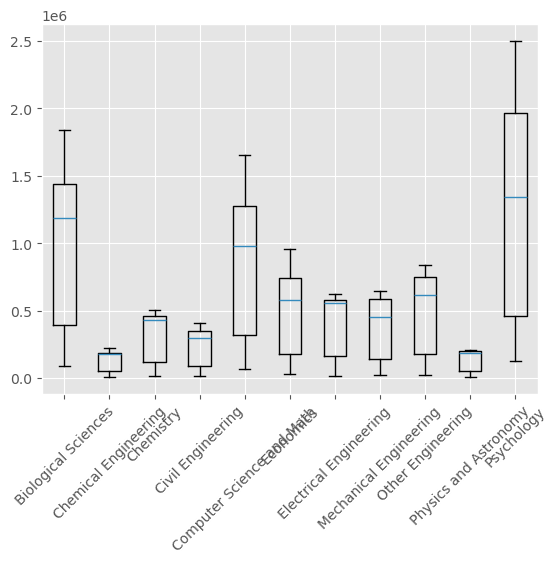

In [50]:
# Initialize an empty list to store the demographics of White individuals for each major
demographics_whites_quantity = []

# Collect the number of White individuals for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Demographics.Ethnicity.Whites' column
    white_demographics = cleaned_df[cleaned_df['Education.Major'] == major]['Demographics.Ethnicity.Whites']
    # Append the Series of White demographics to the list
    demographics_whites_quantity.append(white_demographics)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = demographics_whites_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = demographics_whites_quantity[i][(demographics_whites_quantity[i] < lower_bound) | (demographics_whites_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of White individuals across all majors
fig, ax = plt.subplots()
ax.boxplot(demographics_whites_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Demographics.Gender.Females, dtype: int64)
Chemical Engineering: Series([], Name: Demographics.Gender.Females, dtype: int64)
Chemistry: Series([], Name: Demographics.Gender.Females, dtype: int64)
Civil Engineering: Series([], Name: Demographics.Gender.Females, dtype: int64)
Computer Science and Math: Series([], Name: Demographics.Gender.Females, dtype: int64)
Economics: Series([], Name: Demographics.Gender.Females, dtype: int64)
Electrical Engineering: Series([], Name: Demographics.Gender.Females, dtype: int64)
Mechanical Engineering: Series([], Name: Demographics.Gender.Females, dtype: int64)
Other Engineering: Series([], Name: Demographics.Gender.Females, dtype: int64)
Physics and Astronomy: Series([], Name: Demographics.Gender.Females, dtype: int64)
Psychology: Series([], Name: Demographics.Gender.Females, dtype: int64)


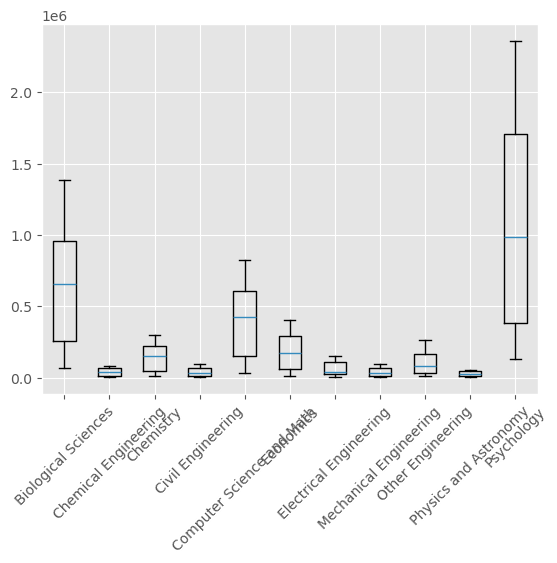

In [51]:
# Initialize an empty list to store the number of female individuals for each major
female_quantity = []

# Collect the number of female individuals for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Demographics.Gender.Females' column
    female_gender = cleaned_df[cleaned_df['Education.Major'] == major]['Demographics.Gender.Females']
    # Append the Series of female demographics to the list
    female_quantity.append(female_gender)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = female_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = female_quantity[i][(female_quantity[i] < lower_bound) | (female_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of female individuals across all majors
fig, ax = plt.subplots()
ax.boxplot(female_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Demographics.Gender.Males, dtype: int64)
Chemical Engineering: Series([], Name: Demographics.Gender.Males, dtype: int64)
Chemistry: Series([], Name: Demographics.Gender.Males, dtype: int64)
Civil Engineering: Series([], Name: Demographics.Gender.Males, dtype: int64)
Computer Science and Math: Series([], Name: Demographics.Gender.Males, dtype: int64)
Economics: Series([], Name: Demographics.Gender.Males, dtype: int64)
Electrical Engineering: Series([], Name: Demographics.Gender.Males, dtype: int64)
Mechanical Engineering: Series([], Name: Demographics.Gender.Males, dtype: int64)
Other Engineering: Series([], Name: Demographics.Gender.Males, dtype: int64)
Physics and Astronomy: Series([], Name: Demographics.Gender.Males, dtype: int64)
Psychology: Series([], Name: Demographics.Gender.Males, dtype: int64)


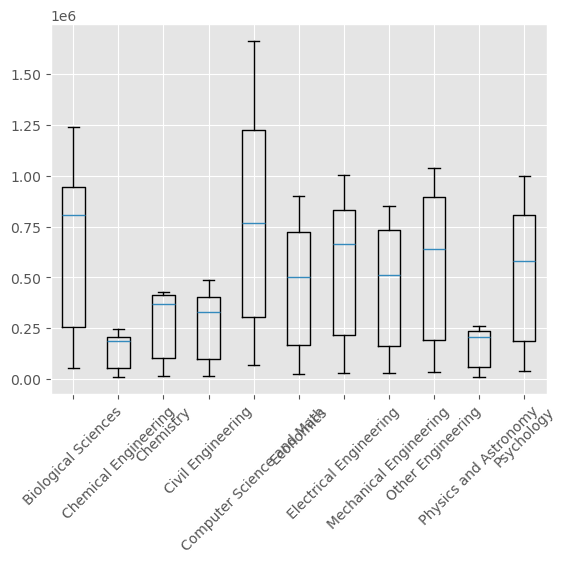

In [52]:
# Initialize an empty list to store the number of male individuals for each major
male_quantity = []

# Collect the number of male individuals for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Demographics.Gender.Males' column
    male_gender = cleaned_df[cleaned_df['Education.Major'] == major]['Demographics.Gender.Males']
    # Append the Series of male demographics to the list
    male_quantity.append(male_gender)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = male_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = male_quantity[i][(male_quantity[i] < lower_bound) | (male_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of male individuals across all majors
fig, ax = plt.subplots()
ax.boxplot(male_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Chemical Engineering: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Chemistry: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Civil Engineering: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Computer Science and Math: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Economics: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Electrical Engineering: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Mechanical Engineering: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Other Engineering: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Physics and Astronomy: Series([], Name: Education.Degrees.Bachelors, dtype: int64)
Psychology: Series([], Name: Education.Degrees.Bachelors, dtype: int64)


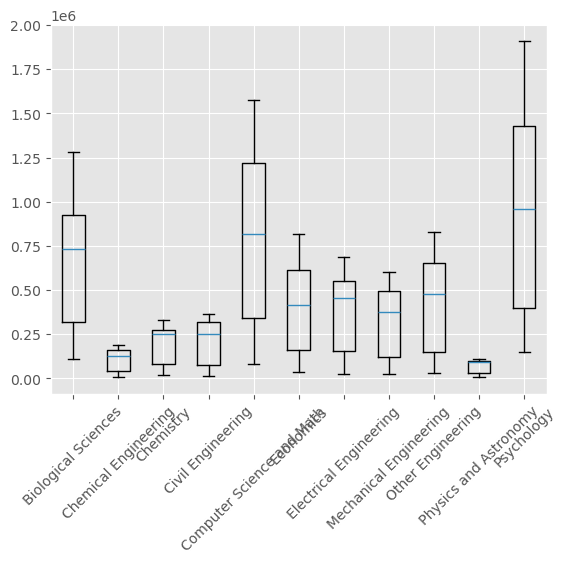

In [53]:
# Initialize an empty list to store the number of bachelor's degrees for each major
bachelors_quantity = []

# Collect the number of bachelor's degrees awarded for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Education.Degrees.Bachelors' column
    bachelors_degrees = cleaned_df[cleaned_df['Education.Major'] == major]['Education.Degrees.Bachelors']
    # Append the Series of bachelor's degrees to the list
    bachelors_quantity.append(bachelors_degrees)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = bachelors_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = bachelors_quantity[i][(bachelors_quantity[i] < lower_bound) | (bachelors_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of bachelor's degrees across all majors
fig, ax = plt.subplots()
ax.boxplot(bachelors_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Chemical Engineering: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Chemistry: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Civil Engineering: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Computer Science and Math: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Economics: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Electrical Engineering: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Mechanical Engineering: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Other Engineering: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Physics and Astronomy: Series([], Name: Education.Degrees.Doctorates, dtype: int64)
Psychology: Series([], Name: Education.Degrees.Doctorates, dtype: int64)


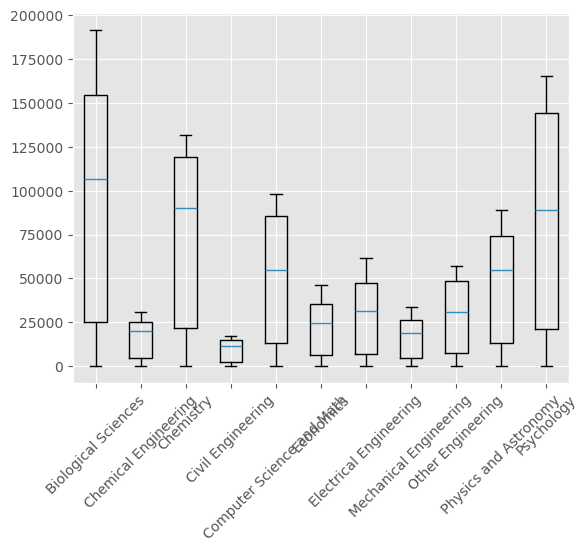

In [54]:
doctorates_quantity = []

for major in unique_majors:
    doctorate_degrees = cleaned_df[cleaned_df['Education.Major'] == major]['Education.Degrees.Doctorates']
    doctorates_quantity.append(doctorate_degrees)

for i, major in enumerate(unique_majors):
    quartiles =  doctorates_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    inter_quartile_range = upperquartile - lowerquartile
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)
    upper_bound = upperquartile + (1.5 * inter_quartile_range)
    possible_outliers = doctorates_quantity[i][(doctorates_quantity[i]<lower_bound) | (doctorates_quantity[i]>upper_bound)]
    print(f"{major}: {possible_outliers}")

flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(doctorates_quantity, labels=majors, flierprops=flierprops)
plt.xticks(rotation=45)
plt.show()

Biological Sciences: Series([], Name: Education.Degrees.Masters, dtype: int64)
Chemical Engineering: Series([], Name: Education.Degrees.Masters, dtype: int64)
Chemistry: Series([], Name: Education.Degrees.Masters, dtype: int64)
Civil Engineering: Series([], Name: Education.Degrees.Masters, dtype: int64)
Computer Science and Math: Series([], Name: Education.Degrees.Masters, dtype: int64)
Economics: Series([], Name: Education.Degrees.Masters, dtype: int64)
Electrical Engineering: Series([], Name: Education.Degrees.Masters, dtype: int64)
Mechanical Engineering: Series([], Name: Education.Degrees.Masters, dtype: int64)
Other Engineering: Series([], Name: Education.Degrees.Masters, dtype: int64)
Physics and Astronomy: Series([], Name: Education.Degrees.Masters, dtype: int64)
Psychology: Series([], Name: Education.Degrees.Masters, dtype: int64)


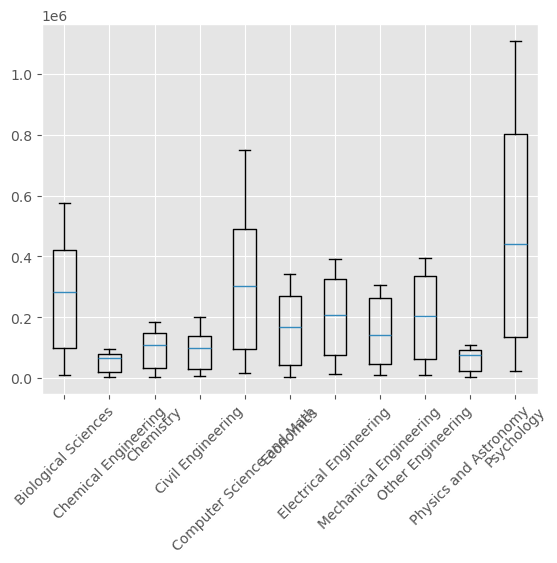

In [55]:
# Initialize an empty list to store the number of master's degrees for each major
masters_quantity = []

# Collect the number of master's degrees awarded for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Education.Degrees.Masters' column
    masters_degrees = cleaned_df[cleaned_df['Education.Major'] == major]['Education.Degrees.Masters']
    # Append the Series of master's degrees to the list
    masters_quantity.append(masters_degrees)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = masters_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = masters_quantity[i][(masters_quantity[i] < lower_bound) | (masters_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of master's degrees across all majors
fig, ax = plt.subplots()
ax.boxplot(masters_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


Biological Sciences: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Chemical Engineering: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Chemistry: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Civil Engineering: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Computer Science and Math: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Economics: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Electrical Engineering: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Mechanical Engineering: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Other Engineering: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Physics and Astronomy: Series([], Name: Education.Degrees.Professionals, dtype: int64)
Psychology: Series([], Name: Education.Degrees.Professionals, dtype: int64)


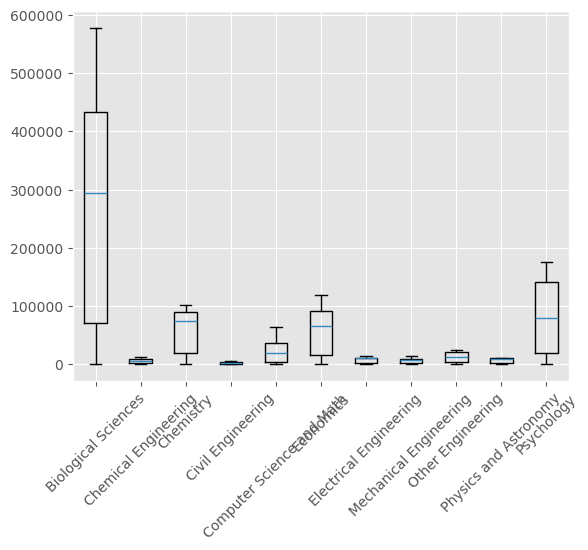

In [56]:
# Initialize an empty list to store the number of professional degrees for each major
professionals_quantity = []

# Collect the number of professional degrees awarded for each major
for major in unique_majors:
    # Filter the DataFrame for the current major and get the 'Education.Degrees.Professionals' column
    professionals_degrees = cleaned_df[cleaned_df['Education.Major'] == major]['Education.Degrees.Professionals']
    # Append the Series of professional degrees to the list
    professionals_quantity.append(professionals_degrees)

# Identify outliers for each major based on the IQR method
for i, major in enumerate(unique_majors):
    # Calculate the 25th, 50th (median), and 75th percentiles (quartiles)
    quartiles = professionals_quantity[i].quantile([0.25, 0.5, 0.75])
    lowerquartile = quartiles[0.25]  # 25th percentile
    upperquartile = quartiles[0.75]  # 75th percentile
    inter_quartile_range = upperquartile - lowerquartile  # Interquartile range (IQR)
    lower_bound = lowerquartile - (1.5 * inter_quartile_range)  # Lower bound for outliers
    upper_bound = upperquartile + (1.5 * inter_quartile_range)  # Upper bound for outliers
    # Identify values that fall outside the bounds (possible outliers)
    possible_outliers = professionals_quantity[i][(professionals_quantity[i] < lower_bound) | (professionals_quantity[i] > upper_bound)]
    # Print the major and its possible outliers
    print(f"{major}: {possible_outliers}")

# Define properties for outlier markers in the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a box plot for the number of professional degrees across all majors
fig, ax = plt.subplots()
ax.boxplot(professionals_quantity, labels=unique_majors, flierprops=flierprops)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Linear regressions and correlations based off number of degrees awarded and mean salary

Correlation between the number of degrees awarded and the average salary: 0.33405891841697377


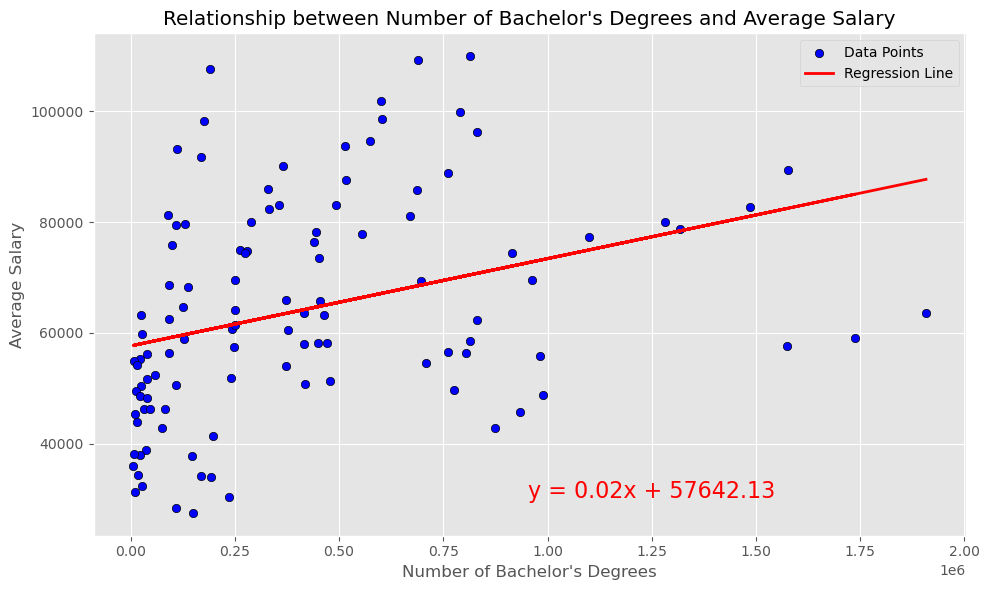

In [58]:
# Calculate the Pearson correlation coefficient
correlation = cleaned_df['Education.Degrees.Bachelors'].corr(cleaned_df['Salaries.Mean'])
print("Correlation between the number of degrees awarded and the average salary:", correlation)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cleaned_df['Education.Degrees.Bachelors'], cleaned_df['Salaries.Mean'])
regress_value = (cleaned_df['Education.Degrees.Bachelors']) * slope + intercept 
r_squared = rvalue ** 2
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Education.Degrees.Bachelors'], cleaned_df['Salaries.Mean'], color='blue', edgecolor='black', label='Data Points')
plt.plot(cleaned_df['Education.Degrees.Bachelors'], regress_value, color="red", linewidth=2, label='Regression Line')
plt.text(
    x=max(cleaned_df['Education.Degrees.Bachelors']) * 0.5,
    y=min(cleaned_df['Salaries.Mean']) * 1.1,
    s=line_eq,
    fontsize=16,
    color="red"
)
plt.title("Relationship between Number of Bachelor's Degrees and Average Salary")
plt.xlabel("Number of Bachelor's Degrees")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation between the number of master's degrees awarded and the average salary: 0.3720583528653052


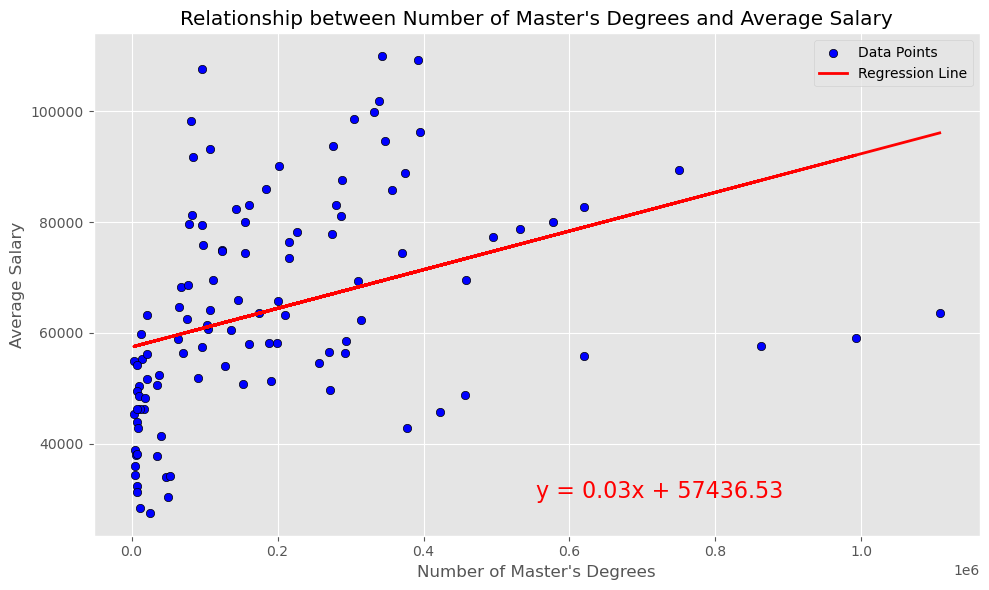

In [59]:
# Calculate the Pearson correlation coefficient
correlation = cleaned_df['Education.Degrees.Masters'].corr(cleaned_df['Salaries.Mean'])
print("Correlation between the number of master's degrees awarded and the average salary:", correlation)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cleaned_df['Education.Degrees.Masters'], cleaned_df['Salaries.Mean'])
regress_value = (cleaned_df['Education.Degrees.Masters']) * slope + intercept 
r_squared = rvalue ** 2
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Education.Degrees.Masters'], cleaned_df['Salaries.Mean'], color='blue', edgecolor='black', label='Data Points')
plt.plot(cleaned_df['Education.Degrees.Masters'], regress_value, color="red", linewidth=2, label='Regression Line')
plt.text(
    x=max(cleaned_df['Education.Degrees.Masters']) * 0.5,
    y=min(cleaned_df['Salaries.Mean']) * 1.1,
    s=line_eq,
    fontsize=16,
    color="red"
)
plt.title("Relationship between Number of Master's Degrees and Average Salary")
plt.xlabel("Number of Master's Degrees")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation between the number of doctorate degrees awarded and the average salary: 0.3621135498308298


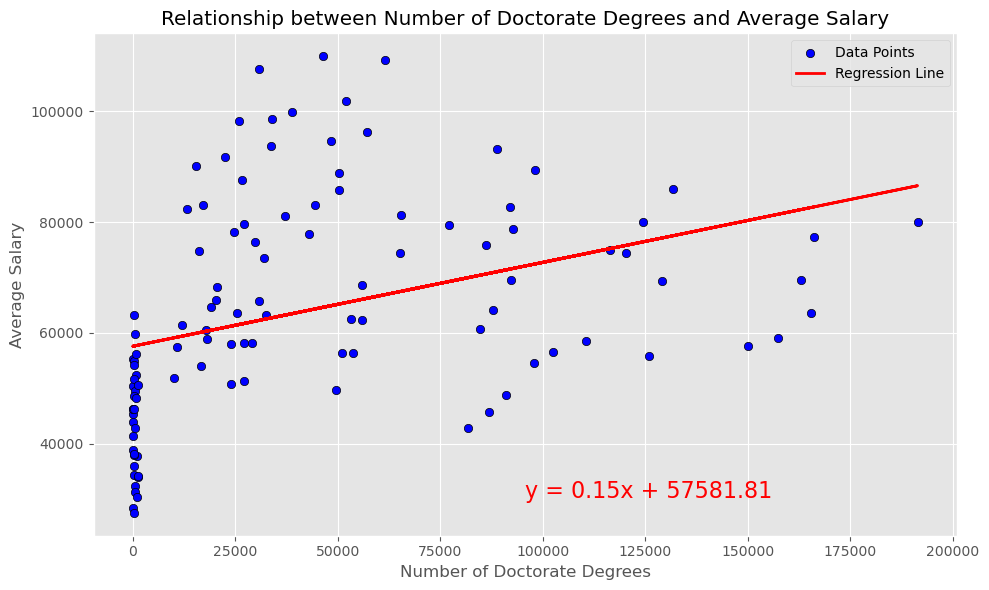

In [60]:
# Calculate the Pearson correlation coefficient
correlation = cleaned_df['Education.Degrees.Doctorates'].corr(cleaned_df['Salaries.Mean'])
print("Correlation between the number of doctorate degrees awarded and the average salary:", correlation)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cleaned_df['Education.Degrees.Doctorates'], cleaned_df['Salaries.Mean'])
regress_value = (cleaned_df['Education.Degrees.Doctorates']) * slope + intercept 
r_squared = rvalue ** 2
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Education.Degrees.Doctorates'], cleaned_df['Salaries.Mean'], color='blue', edgecolor='black', label='Data Points')
plt.plot(cleaned_df['Education.Degrees.Doctorates'], regress_value, color="red", linewidth=2, label='Regression Line')
plt.text(
    x=max(cleaned_df['Education.Degrees.Doctorates']) * 0.5,
    y=min(cleaned_df['Salaries.Mean']) * 1.1,
    s=line_eq,
    fontsize=16,
    color="red"
)
plt.title("Relationship between Number of Doctorate Degrees and Average Salary")
plt.xlabel("Number of Doctorate Degrees")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation between the number of professional degrees awarded and the average salary: 0.13989199527437818


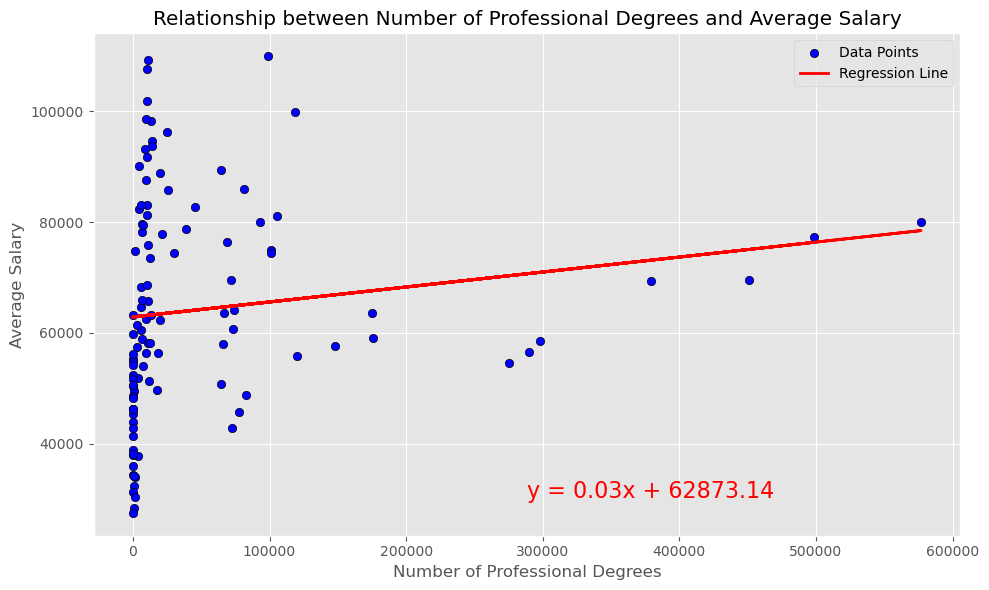

In [61]:
# Calculate the Pearson correlation coefficient
correlation = cleaned_df['Education.Degrees.Professionals'].corr(cleaned_df['Salaries.Mean'])
print("Correlation between the number of professional degrees awarded and the average salary:", correlation)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cleaned_df['Education.Degrees.Professionals'], cleaned_df['Salaries.Mean'])
regress_value = (cleaned_df['Education.Degrees.Professionals']) * slope + intercept 
r_squared = rvalue ** 2
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Education.Degrees.Professionals'], cleaned_df['Salaries.Mean'], color='blue', edgecolor='black', label='Data Points')
plt.plot(cleaned_df['Education.Degrees.Professionals'], regress_value, color="red", linewidth=2, label='Regression Line')
plt.text(
    x=max(cleaned_df['Education.Degrees.Professionals']) * 0.5,
    y=min(cleaned_df['Salaries.Mean']) * 1.1,
    s=line_eq,
    fontsize=16,
    color="red"
)
plt.title("Relationship between Number of Professional Degrees and Average Salary")
plt.xlabel("Number of Professional Degrees")
plt.ylabel("Average Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Average number of graduates per major per year separated by sex

In [137]:
# Calculate the number of graduates for males and females across different majors
mean_graduates_by_gender = cleaned_df.groupby('Education.Major')[['Demographics.Gender.Males', 'Demographics.Gender.Females']].mean()

# Optionally, you can calculate the mean graduate difference
mean_graduates_by_gender['Graduate Difference'] = (mean_graduates_by_gender['Demographics.Gender.Males'] - mean_graduates_by_gender['Demographics.Gender.Females']).abs()

# Display the results
print(mean_graduates_by_gender)

                           Demographics.Gender.Males  \
Education.Major                                        
Biological Sciences                    664296.888889   
Chemical Engineering                   141653.777778   
Chemistry                              273304.111111   
Civil Engineering                      271340.888889   
Computer Science and Math              803886.111111   
Economics                              469802.333333   
Electrical Engineering                 550590.888889   
Mechanical Engineering                 463431.888889   
Other Engineering                      568937.555556   
Physics and Astronomy                  156708.111111   
Psychology                             531401.888889   

                           Demographics.Gender.Females  Graduate Difference  
Education.Major                                                              
Biological Sciences                       6.608886e+05          3408.333333  
Chemical Engineering                 

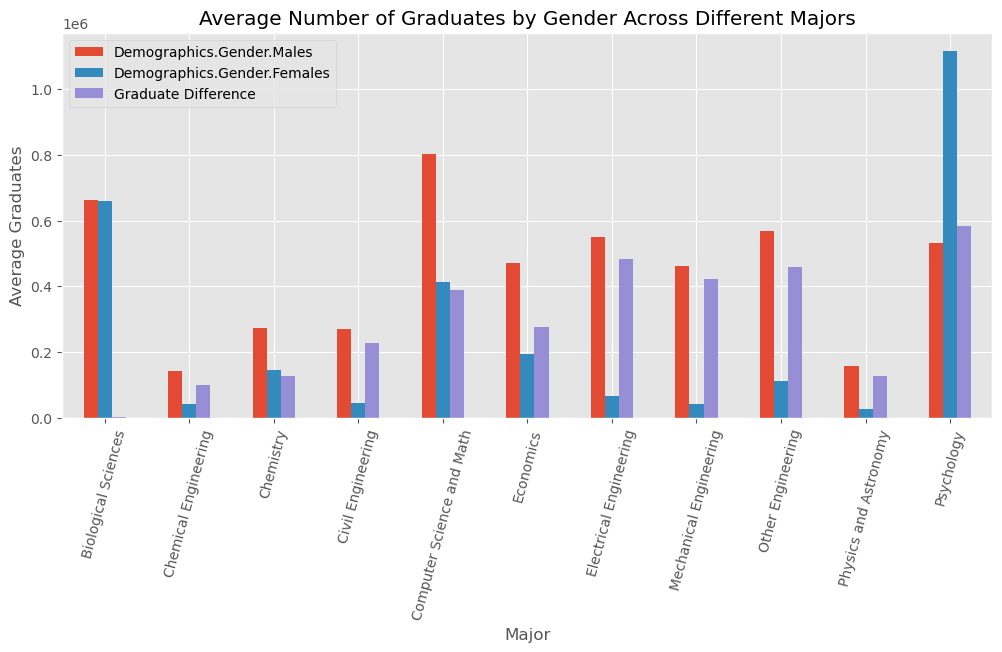

In [145]:
# Plot a bar chart
mean_graduates_by_gender.plot(kind='bar', figsize=(12, 5))

# Add title and labels
plt.title('Average Number of Graduates by Gender Across Different Majors')
plt.xlabel('Major')
plt.ylabel('Average Graduates')
plt.xticks(rotation=75)

# Show the plot
plt.show()

### T & P test for average number of graduates

In [66]:
# Perform t-test between male and female degress awarded 
t_stat, p_value = ttest_ind(cleaned_df['Demographics.Gender.Males'], cleaned_df['Demographics.Gender.Females'], nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.5343595257851663
P-value: 0.0004990495601842523


## Salary growth over 20-year period based off 2 largest salary groups and 2 smallest salary groups

In [68]:
# Calculate the percentage change in salary (i.e., salary growth) for each major over the years
cleaned_df['Salary_Growth'] = cleaned_df.groupby('Education.Major')['Salaries.Mean'].pct_change() * 100

# Drop rows where salary growth is NaN (first year for each major)
cleaned_df = cleaned_df.dropna(subset=['Salary_Growth'])

# View the DataFrame with the salary growth column
cleaned_df.head()

,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Degrees.Bachelors,Education.Degrees.Doctorates,Education.Degrees.Masters,Education.Degrees.Professionals,Salary_Growth
94,1997,1424192,Biological Sciences,56631.83,48000,11318,103420,129773,1189282,627727,796465,760986,102466,271051,289689,3.866752
95,1997,216869,Chemical Engineering,64742.50,62000,2466,30195,14144,172529,35454,181414,126361,19022,65302,6183,9.925476
96,1997,518969,Chemistry,64147.67,60000,6298,51184,38819,428888,148662,370308,249760,87844,107519,73846,5.684030
97,1997,357852,Civil Engineering,57421.79,54000,2992,40608,20776,296196,29742,328111,248117,10772,96137,2825,10.941480
98,1997,1168978,Computer Science and Math,56385.76,53000,7821,95989,111345,961216,417769,751208,804425,53774,292195,18584,13.514792


In [69]:
# Select columns for Year, demographics, major, mean salaries, and salary growth
salary_df_columns = ['Year', 'Demographics.Total', 'Education.Major', 'Salaries.Mean', 'Salary_Growth']

# Create a new DataFrame with selected columns
salary_growth_df = cleaned_df[salary_df_columns]

# Display the first few rows of the new DataFrame
salary_growth_df.head()


,Year,Demographics.Total,Education.Major,Salaries.Mean,Salary_Growth
94,1997,1424192,Biological Sciences,56631.83,3.866752
95,1997,216869,Chemical Engineering,64742.50,9.925476
96,1997,518969,Chemistry,64147.67,5.684030
97,1997,357852,Civil Engineering,57421.79,10.941480
98,1997,1168978,Computer Science and Math,56385.76,13.514792


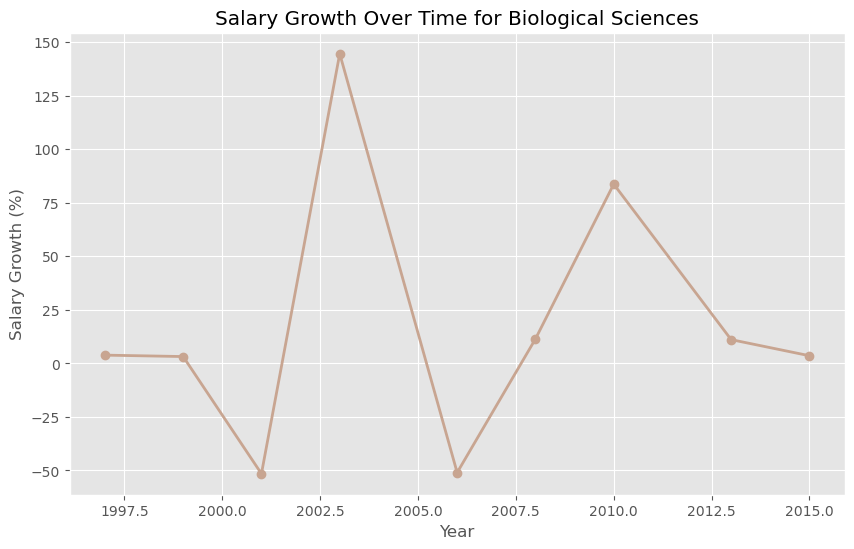

In [70]:
# Filter data for Biological Sciences
specific_growth_bio = salary_growth_df[salary_growth_df['Education.Major'] == 'Biological Sciences']

# Plot salary growth over time for Biological Sciences
plt.figure(figsize=(10, 6))
plt.plot(specific_growth_bio['Year'], specific_growth_bio['Salary_Growth'], marker='o', linestyle='-', color='#c8a591ff', linewidth=2)

# Add title and labels
plt.title('Salary Growth Over Time for Biological Sciences')
plt.xlabel('Year')
plt.ylabel('Salary Growth (%)')
plt.grid(True)
plt.show()


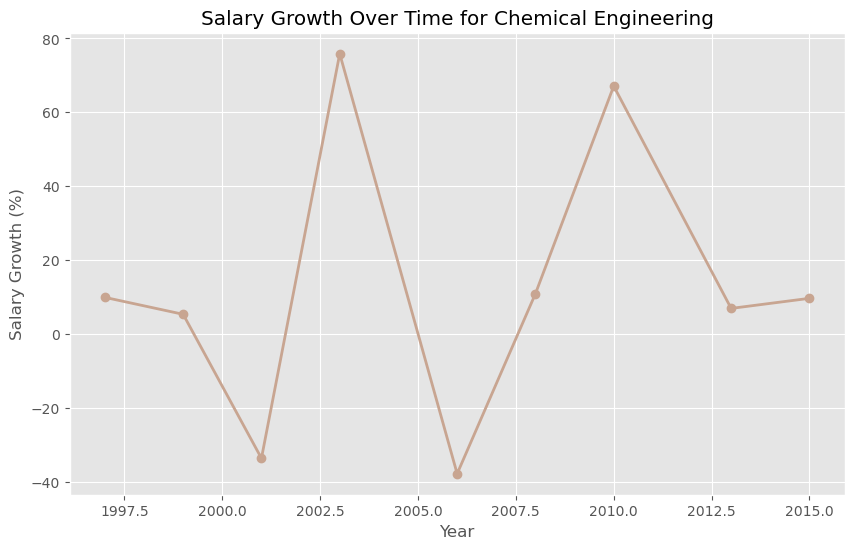

In [71]:
# Filter data for Chemical Engineering
specific_growth_cheme = salary_growth_df[salary_growth_df['Education.Major'] == 'Chemical Engineering']

# Plot salary growth over time for Chemical Engineering
plt.figure(figsize=(10, 6))
plt.plot(specific_growth_cheme['Year'], specific_growth_cheme['Salary_Growth'], marker='o', linestyle='-', color='#c8a591ff', linewidth=2)

# Add title and labels
plt.title('Salary Growth Over Time for Chemical Engineering')
plt.xlabel('Year')
plt.ylabel('Salary Growth (%)')
plt.grid(True)
plt.show()


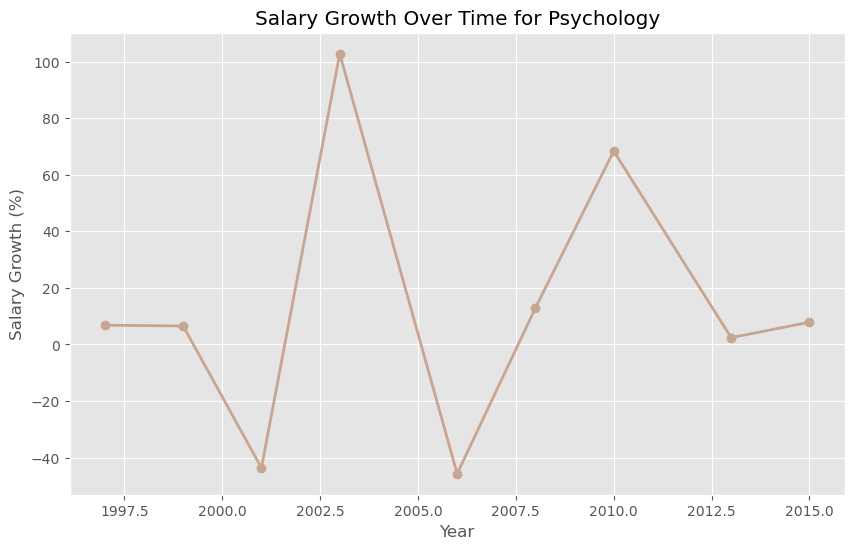

In [72]:
# Filter data for the specific major "Psychology"
specific_growth_psychology = salary_growth_df[salary_growth_df['Education.Major'] == 'Psychology']

# Create a plot with a specified size
plt.figure(figsize=(10, 6))

# Plot salary growth over time with markers and a line
plt.plot(specific_growth_psychology['Year'], specific_growth_psychology['Salary_Growth'], 
         marker='o', linestyle='-', color='#c8a591ff', linewidth=2)

# Add title and labels to the plot
plt.title('Salary Growth Over Time for Psychology')
plt.xlabel('Year')
plt.ylabel('Salary Growth (%)')

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


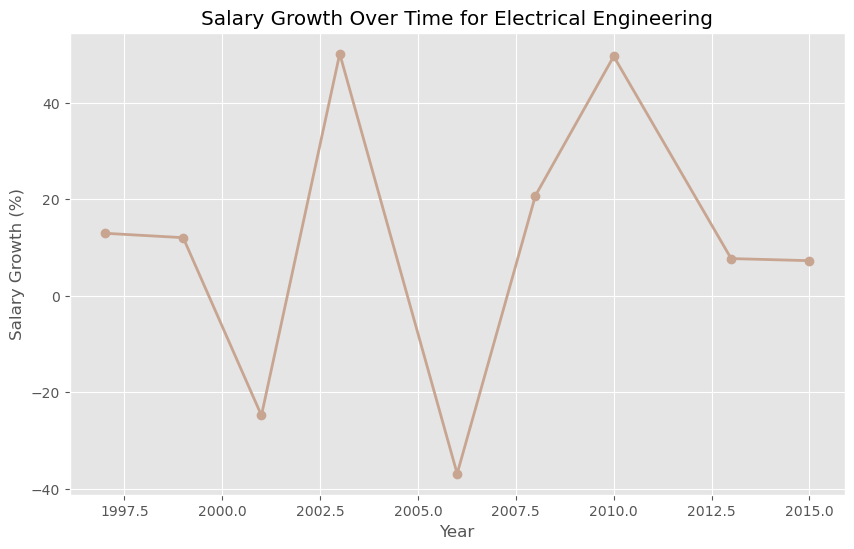

In [73]:
# Filter data for the specific major "Electrical Engineering"
specific_growth_ee = salary_growth_df[salary_growth_df['Education.Major'] == 'Electrical Engineering']

# Create a plot with a specified size
plt.figure(figsize=(10, 6))

# Plot salary growth over time with markers and a line
plt.plot(specific_growth_ee['Year'], specific_growth_ee['Salary_Growth'], 
         marker='o', linestyle='-', color='#c8a591ff', linewidth=2)

# Add title and labels to the plot
plt.title('Salary Growth Over Time for Electrical Engineering')
plt.xlabel('Year')
plt.ylabel('Salary Growth (%)')

# Add gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()
